# Full Marketing Funnel Optimization

This project aims to analyze a synthetic marketing dataset and apply:
1. Funnel analysis
2. A/B testing on campaign variants
3. Customer segmentation
4. Predictive modeling for future conversions 

We want to answer:
- Which campaigns perform best?
- What types of customers convert?
- How can we optimize marketing efforts?

### Loading of dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("digital_marketing_campaign_dataset.csv")

In [3]:
df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [5]:
df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [6]:
df.dtypes

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object

There are no null values and the types are correctly assigned, except for the object type columns which need to be converted to categorical.

In [7]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CustomerID           8000 non-null   int64   
 1   Age                  8000 non-null   int64   
 2   Gender               8000 non-null   category
 3   Income               8000 non-null   int64   
 4   CampaignChannel      8000 non-null   category
 5   CampaignType         8000 non-null   category
 6   AdSpend              8000 non-null   float64 
 7   ClickThroughRate     8000 non-null   float64 
 8   ConversionRate       8000 non-null   float64 
 9   WebsiteVisits        8000 non-null   int64   
 10  PagesPerVisit        8000 non-null   float64 
 11  TimeOnSite           8000 non-null   float64 
 12  SocialShares         8000 non-null   int64   
 13  EmailOpens           8000 non-null   int64   
 14  EmailClicks          8000 non-null   int64   
 15  PreviousPurchases    

In [9]:
for col in df.select_dtypes(['category']).columns:
    print(f"{col}: {df[col].cat.categories.tolist()}")

Gender: ['Female', 'Male']
CampaignChannel: ['Email', 'PPC', 'Referral', 'SEO', 'Social Media']
CampaignType: ['Awareness', 'Consideration', 'Conversion', 'Retention']
AdvertisingPlatform: ['IsConfid']
AdvertisingTool: ['ToolConfid']


AdvertisingPlatform and AdvertisingTool are constant values as for this camapign the same advertising paltform and tool was used, so we can drop them

In [10]:
df = df.drop(['AdvertisingPlatform', 'AdvertisingTool'], axis=1)

df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

   Conversion  
0           1  
1           1  
2           1  
3           1  
4           1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         8000 non-null   int64   
 1   Age                8000 non-null   int64   
 2   Gender             8000 non-null   category
 3   Income             8000 non-null   int64   
 4   CampaignChannel    8000 non-null   category
 5   CampaignType       8000 non-null   category
 6   AdSpend            8000 non-null   float64 
 7   ClickThroughRate   8000 non-null   float64 
 8   ConversionRate     8000 non-null   float64 
 9   WebsiteVisits      8000 non-null   int64   
 10  PagesPerVisit      8000 non-null   float64 
 11  TimeOnSite         8000 non-null   float64 
 12  SocialShares       8000 non-null   int64   
 13  EmailOpens         8000 non-null   int64   
 14  EmailClicks        8000 non-null   int64   
 15  PreviousPurchases  8000 non-null   int64   
 16  Loyalt

### EDA

In [12]:
df.describe()

CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.302479     4.068340   
50%          0.104046      25.000000       5.534257     7.682956   
75%          0.152077      37.000000       7.835756    11.481468   
max          0.199995      49.000000       9.999055    14.995311   

       SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count   8000.000000  8000.000000  8000.000000        8000.000000   
mean      49.799750     9.476875     4.467375           4.485500   
std       28.901165     5.711111     2.856564           2.888093   
min        0.000000     0.000000     0.000000           0.000000   
25%       25.000000     5.000000     2.000000           2.000000   
50%       50.000000     9.000000     4.000000           4.000000   
75%       75.000000    14.000000     7.000000           7.000000   
max       99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    8000.000000  8000.000000  
mean     2490.268500     0.876500  
std      1429.527162     0.329031  
min         0.000000     0.000000  
25%      1254.750000     1.000000  
50%      2497.000000     1.000000  
75%      3702.250000     1.000000  
max      4999.000000     1.000000

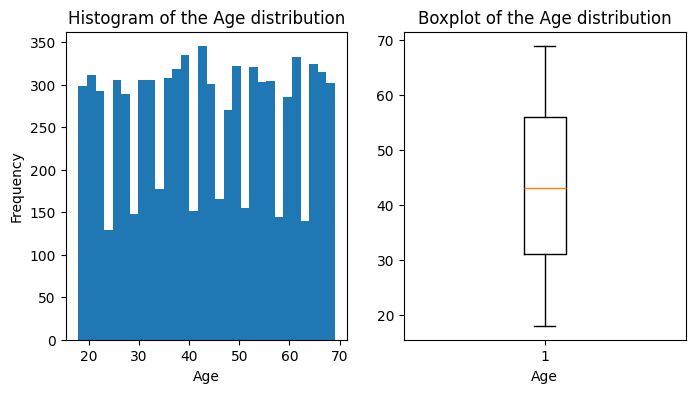

In [13]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["Age"].values, bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of the Age distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Age"].values)
plt.xlabel("Age")
plt.title("Boxplot of the Age distribution")

plt.show()

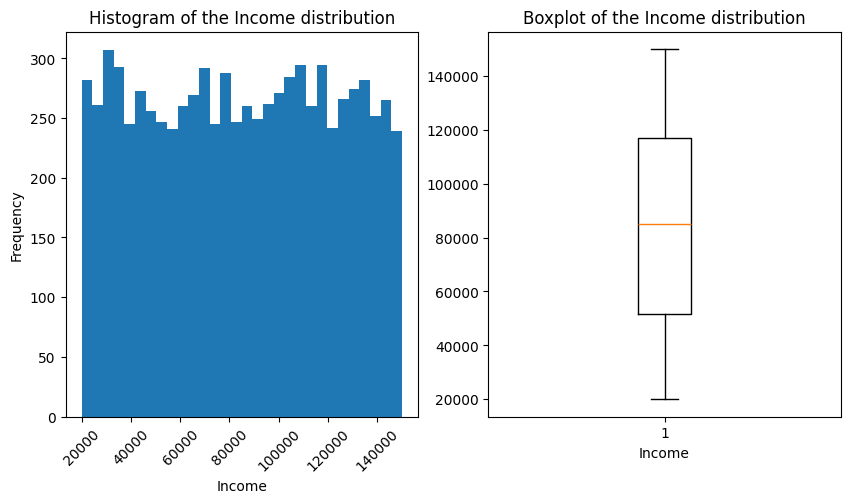

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["Income"].values, bins=30)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.title("Histogram of the Income distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Income"].values)
plt.xlabel("Income")
plt.title("Boxplot of the Income distribution")

plt.show()

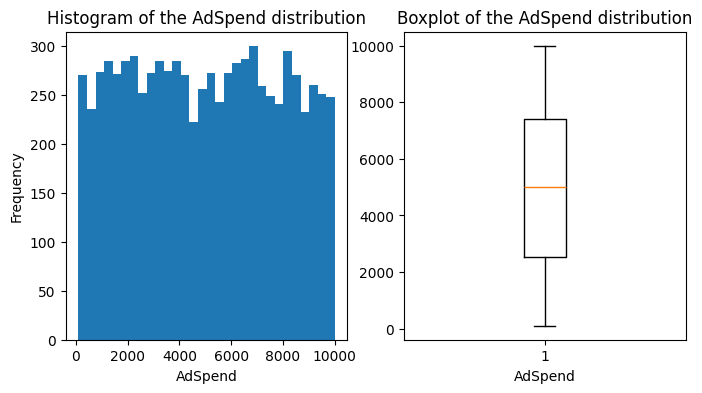

In [15]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["AdSpend"].values, bins=30)
plt.xlabel("AdSpend")
plt.ylabel("Frequency")
plt.title("Histogram of the AdSpend distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["AdSpend"].values)
plt.xlabel("AdSpend")
plt.title("Boxplot of the AdSpend distribution")

plt.show()

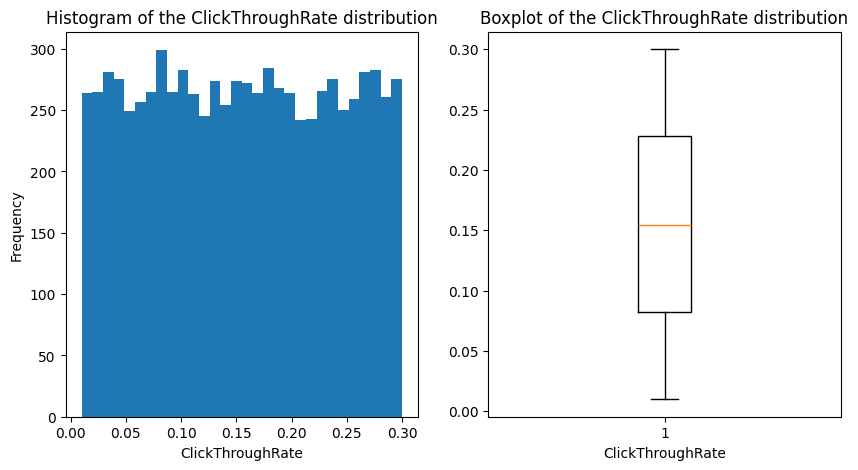

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["ClickThroughRate"].values, bins=30)
plt.xlabel("ClickThroughRate")
plt.ylabel("Frequency")
plt.title("Histogram of the ClickThroughRate distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["ClickThroughRate"].values)
plt.xlabel("ClickThroughRate")
plt.title("Boxplot of the ClickThroughRate distribution")

plt.show()

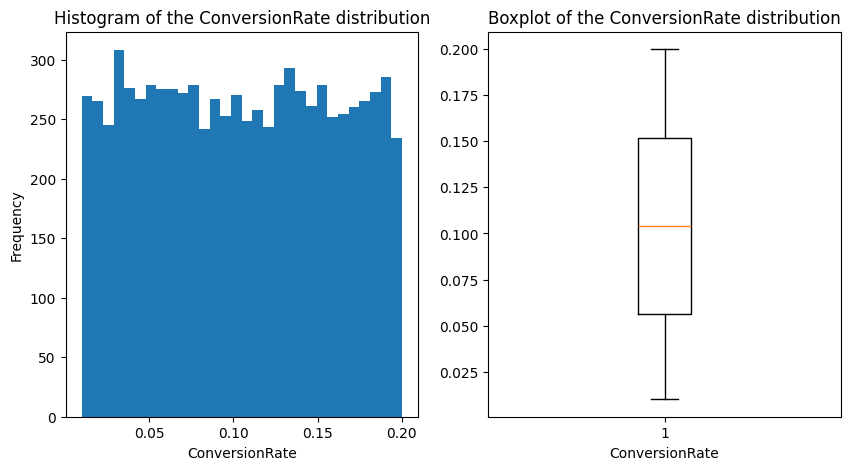

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["ConversionRate"].values, bins=30)
plt.xlabel("ConversionRate")
plt.ylabel("Frequency")
plt.title("Histogram of the ConversionRate distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["ConversionRate"].values)
plt.xlabel("ConversionRate")
plt.title("Boxplot of the ConversionRate distribution")

plt.show()

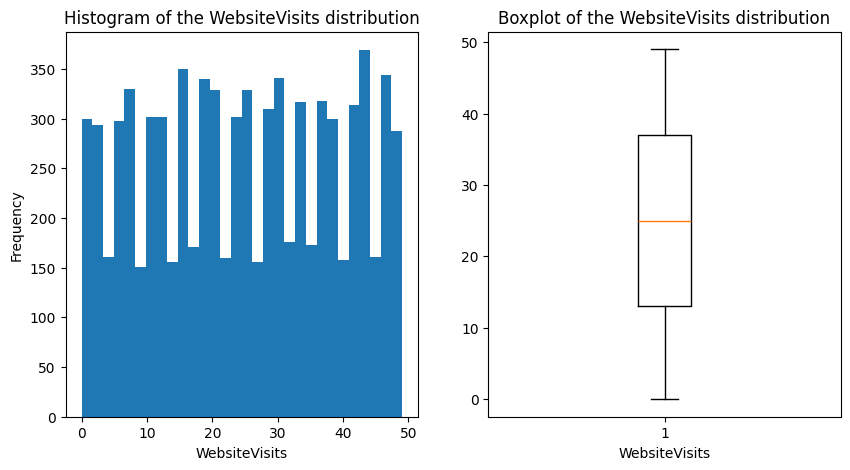

In [18]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["WebsiteVisits"].values, bins=30)
plt.xlabel("WebsiteVisits")
plt.ylabel("Frequency")
plt.title("Histogram of the WebsiteVisits distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["WebsiteVisits"].values)
plt.xlabel("WebsiteVisits")
plt.title("Boxplot of the WebsiteVisits distribution")

plt.show()

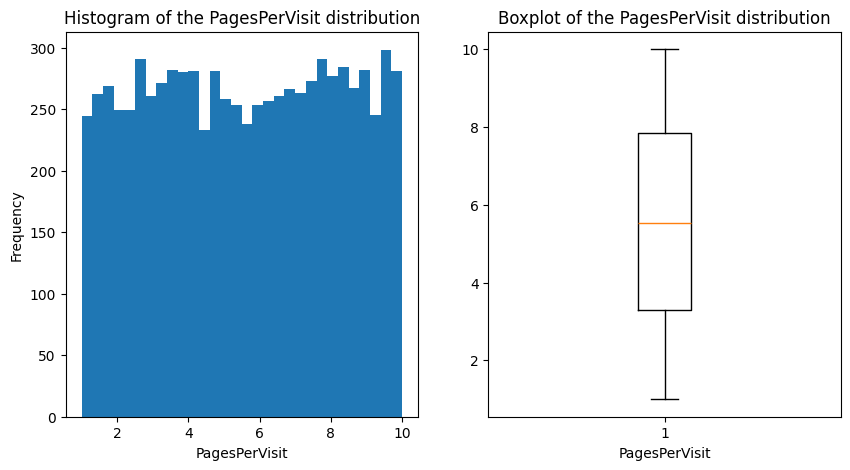

In [19]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["PagesPerVisit"].values, bins=30)
plt.xlabel("PagesPerVisit")
plt.ylabel("Frequency")
plt.title("Histogram of the PagesPerVisit distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["PagesPerVisit"].values)
plt.xlabel("PagesPerVisit")
plt.title("Boxplot of the PagesPerVisit distribution")

plt.show()

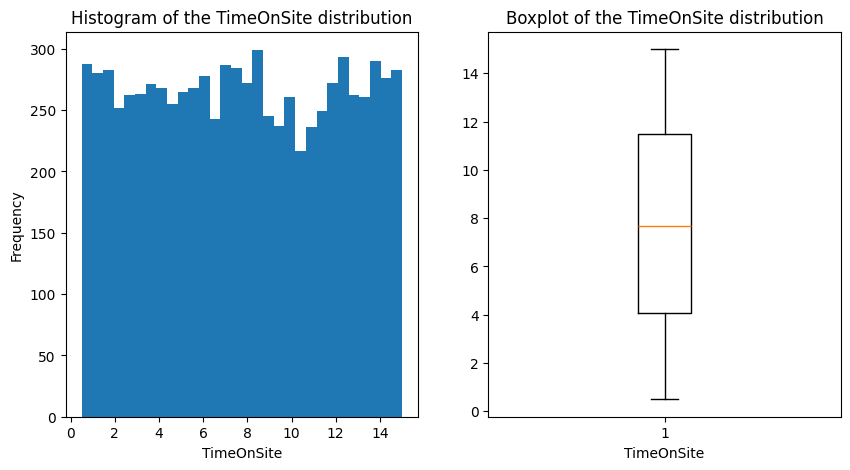

In [20]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["TimeOnSite"].values, bins=30)
plt.xlabel("TimeOnSite")
plt.ylabel("Frequency")
plt.title("Histogram of the TimeOnSite distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["TimeOnSite"].values)
plt.xlabel("TimeOnSite")
plt.title("Boxplot of the TimeOnSite distribution")

plt.show()

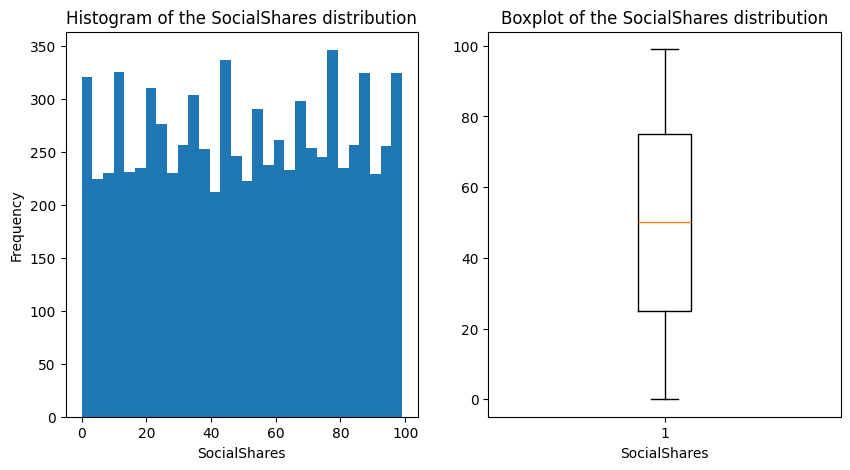

In [21]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["SocialShares"].values, bins=30)
plt.xlabel("SocialShares")
plt.ylabel("Frequency")
plt.title("Histogram of the SocialShares distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["SocialShares"].values)
plt.xlabel("SocialShares")
plt.title("Boxplot of the SocialShares distribution")

plt.show()

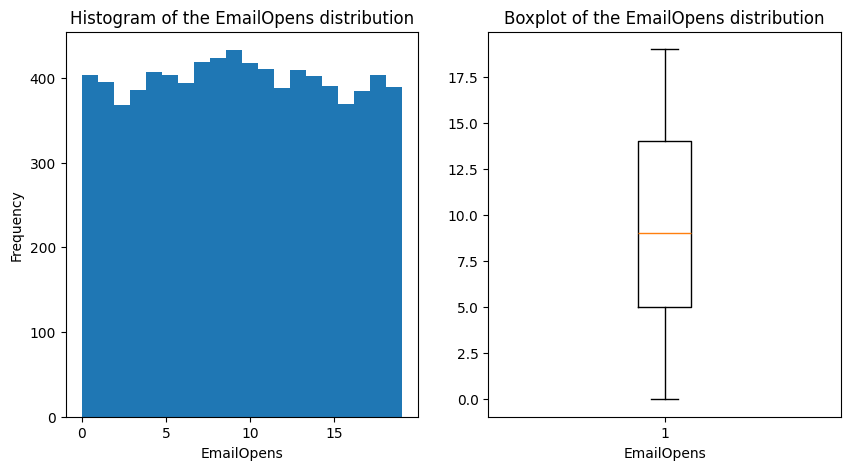

In [22]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["EmailOpens"].values, bins=20)
plt.xlabel("EmailOpens")
plt.ylabel("Frequency")
plt.title("Histogram of the EmailOpens distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["EmailOpens"].values)
plt.xlabel("EmailOpens")
plt.title("Boxplot of the EmailOpens distribution")

plt.show()

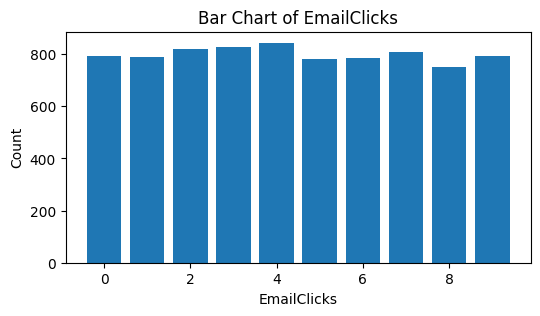

In [23]:
plt.figure(figsize=(6, 3))
plt.bar(df["EmailClicks"].value_counts().index, df["EmailClicks"].value_counts().values)
plt.xlabel("EmailClicks")
plt.ylabel("Count")
plt.title("Bar Chart of EmailClicks")
plt.show()

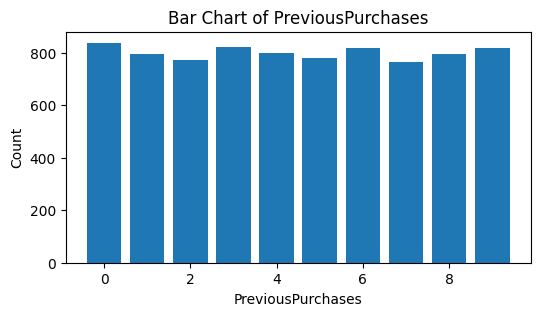

In [24]:
plt.figure(figsize=(6, 3))
plt.bar(df["PreviousPurchases"].value_counts().index, df["PreviousPurchases"].value_counts().values)
plt.xlabel("PreviousPurchases")
plt.ylabel("Count")
plt.title("Bar Chart of PreviousPurchases")
plt.show()

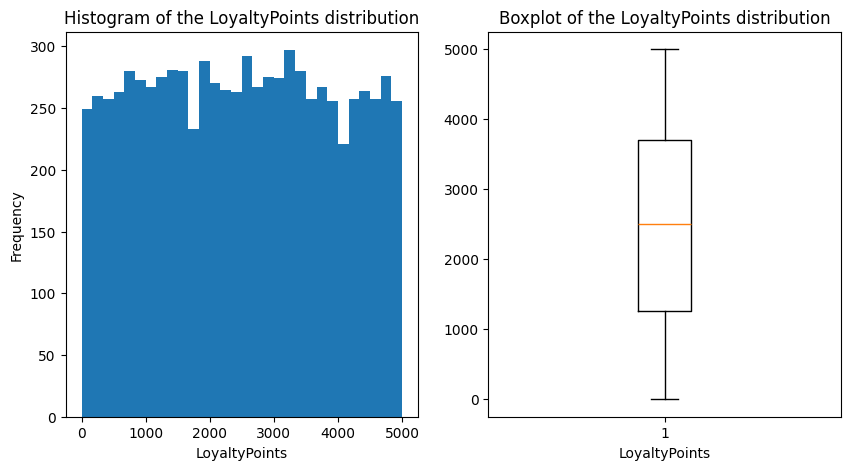

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df["LoyaltyPoints"].values, bins=30)
plt.xlabel("LoyaltyPoints")
plt.ylabel("Frequency")
plt.title("Histogram of the LoyaltyPoints distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["LoyaltyPoints"].values)
plt.xlabel("LoyaltyPoints")
plt.title("Boxplot of the LoyaltyPoints distribution")

plt.show()

As we have a synthetic dataset, all the quantittative variables aren't completely normally distributed and there are no outliers

In [26]:
df['Conversion_label'] = df['Conversion'].map({0: 'No', 1: 'Yes'})

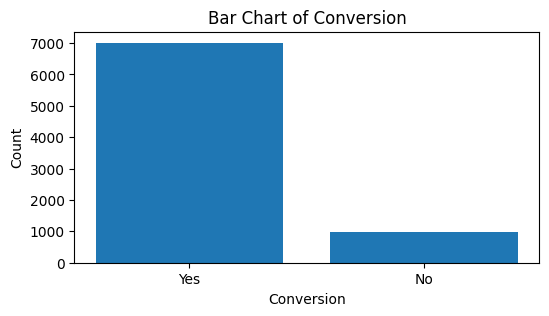

In [27]:
plt.figure(figsize=(6, 3))
plt.bar(df["Conversion_label"].value_counts().index, df["Conversion_label"].value_counts().values)
plt.xlabel("Conversion")
plt.ylabel("Count")
plt.title("Bar Chart of Conversion")
plt.show()

As we can see we have very unbalanced classes.

Now we will look at the other categorical variables

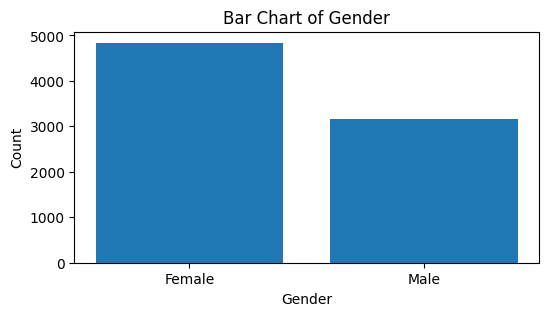

In [28]:
plt.figure(figsize=(6, 3))
plt.bar(df["Gender"].value_counts().index, df["Gender"].value_counts().values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Bar Chart of Gender")
plt.show()

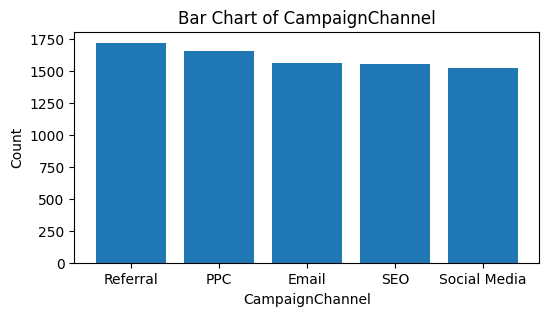

In [29]:
plt.figure(figsize=(6, 3))
plt.bar(df["CampaignChannel"].value_counts().index, df["CampaignChannel"].value_counts().values)
plt.xlabel("CampaignChannel")
plt.ylabel("Count")
plt.title("Bar Chart of CampaignChannel")
plt.show()

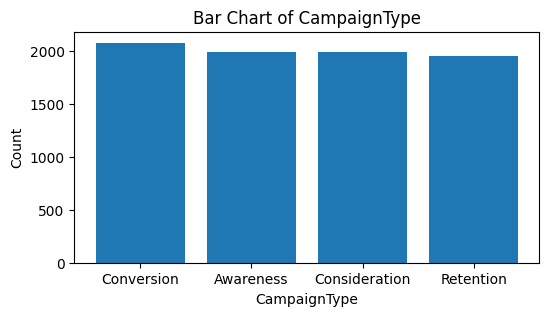

In [30]:
plt.figure(figsize=(6, 3))
plt.bar(df["CampaignType"].value_counts().index, df["CampaignType"].value_counts().values)
plt.xlabel("CampaignType")
plt.ylabel("Count")
plt.title("Bar Chart of CampaignType")
plt.show()

Now we can have a look at the correlation between quantitative features

In [31]:
df_quantitative = df[["Age", "Income", "AdSpend", "ClickThroughRate", "ConversionRate", "WebsiteVisits", "SocialShares", "EmailOpens", "EmailClicks", "PreviousPurchases", "LoyaltyPoints", "Conversion"]]

corr_matrix = df_quantitative.corr()
corr_matrix

Age    Income   AdSpend  ClickThroughRate  \
Age                1.000000  0.008731 -0.004607          0.011542   
Income             0.008731  1.000000  0.003668          0.008080   
AdSpend           -0.004607  0.003668  1.000000         -0.008296   
ClickThroughRate   0.011542  0.008080 -0.008296          1.000000   
ConversionRate     0.020027  0.017552 -0.020185         -0.008161   
WebsiteVisits     -0.002078 -0.002923  0.007265         -0.023148   
SocialShares      -0.009531 -0.006297 -0.021058         -0.013287   
EmailOpens         0.015055 -0.001506  0.016514         -0.006076   
EmailClicks        0.008820  0.008541  0.001021         -0.010825   
PreviousPurchases -0.007123 -0.011924  0.002378         -0.000387   
LoyaltyPoints      0.014049 -0.007181  0.002045         -0.017314   
Conversion         0.001606  0.013974  0.124672          0.120012   

                   ConversionRate  WebsiteVisits  SocialShares  EmailOpens  \
Age                      0.020027      -0.002078     -0.009531    0.015055   
Income                   0.017552      -0.002923     -0.006297   -0.001506   
AdSpend                 -0.020185       0.007265     -0.021058    0.016514   
ClickThroughRate        -0.008161      -0.023148     -0.013287   -0.006076   
ConversionRate           1.000000      -0.012081      0.008713    0.006449   
WebsiteVisits           -0.012081       1.000000      0.000328    0.005865   
SocialShares             0.008713       0.000328      1.000000   -0.012028   
EmailOpens               0.006449       0.005865     -0.012028    1.000000   
EmailClicks              0.006716       0.003274      0.003214    0.001410   
PreviousPurchases       -0.023209       0.013739     -0.012635    0.001333   
LoyaltyPoints           -0.000498       0.003363     -0.004575   -0.002839   
Conversion               0.093185       0.079339     -0.011449    0.124884   

                   EmailClicks  PreviousPurchases  LoyaltyPoints  Conversion  
Age                   0.008820          -0.007123       0.014049    0.001606  
Income                0.008541          -0.011924      -0.007181    0.013974  
AdSpend               0.001021           0.002378       0.002045    0.124672  
ClickThroughRate     -0.010825          -0.000387      -0.017314    0.120012  
ConversionRate        0.006716          -0.023209      -0.000498    0.093185  
WebsiteVisits         0.003274           0.013739       0.003363    0.079339  
SocialShares          0.003214          -0.012635      -0.004575   -0.011449  
EmailOpens            0.001410           0.001333      -0.002839    0.124884  
EmailClicks           1.000000           0.001284      -0.002837    0.129521  
PreviousPurchases     0.001284           1.000000       0.011899    0.111781  
LoyaltyPoints        -0.002837           0.011899       1.000000    0.095004  
Conversion            0.129521           0.111781       0.095004    1.000000

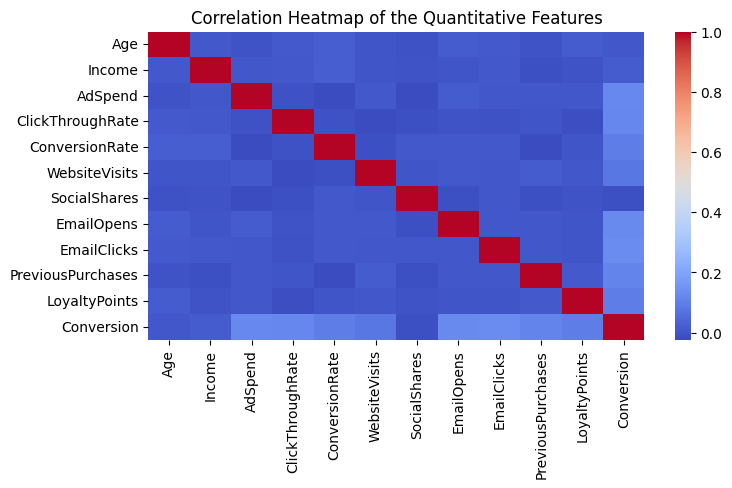

In [32]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, cmap='coolwarm') 
plt.title('Correlation Heatmap of the Quantitative Features')
plt.show()

The features do not seem to be correlated at all.

Now we will look at the Conversion per category more closely and see if there are any noticeble differences.

C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\3243058568.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate_gender = df.groupby('Gender')['Conversion'].mean().reset_index()


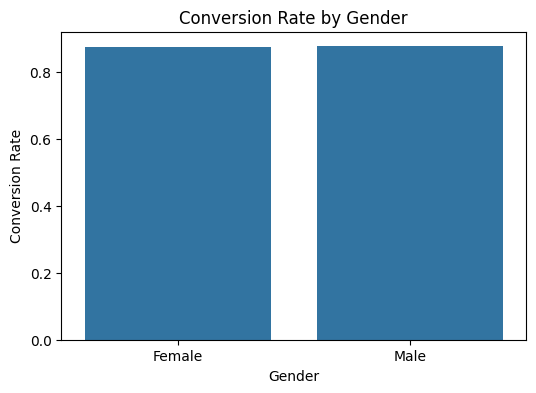

In [33]:
conversion_rate_gender = df.groupby('Gender')['Conversion'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=conversion_rate_gender, x='Gender', y='Conversion')
plt.title('Conversion Rate by Gender')
plt.ylabel('Conversion Rate')
plt.xlabel('Gender')
plt.show()

C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\3291009531.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate_gender = df.groupby('CampaignChannel')['Conversion'].mean().reset_index()


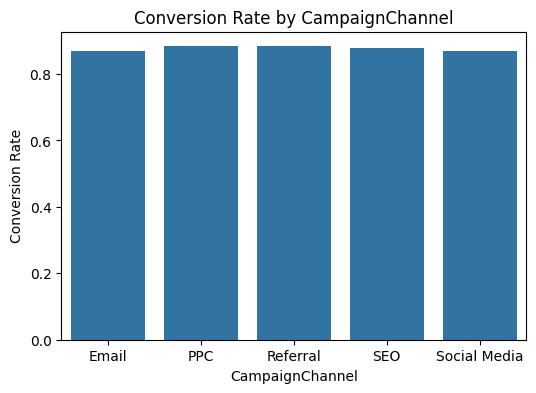

In [34]:
conversion_rate_gender = df.groupby('CampaignChannel')['Conversion'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=conversion_rate_gender, x='CampaignChannel', y='Conversion')
plt.title('Conversion Rate by CampaignChannel')
plt.ylabel('Conversion Rate')
plt.xlabel('CampaignChannel')
plt.show()

C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\2851059214.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate_gender = df.groupby('CampaignType')['Conversion'].mean().reset_index()


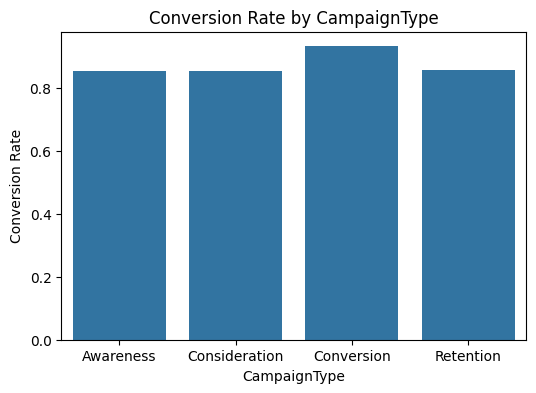

In [35]:
conversion_rate_gender = df.groupby('CampaignType')['Conversion'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=conversion_rate_gender, x='CampaignType', y='Conversion')
plt.title('Conversion Rate by CampaignType')
plt.ylabel('Conversion Rate')
plt.xlabel('CampaignType')
plt.show()

As this is a synthetic dataset, there aren't any noticeble differences.

Now let's see for the quantitative variables

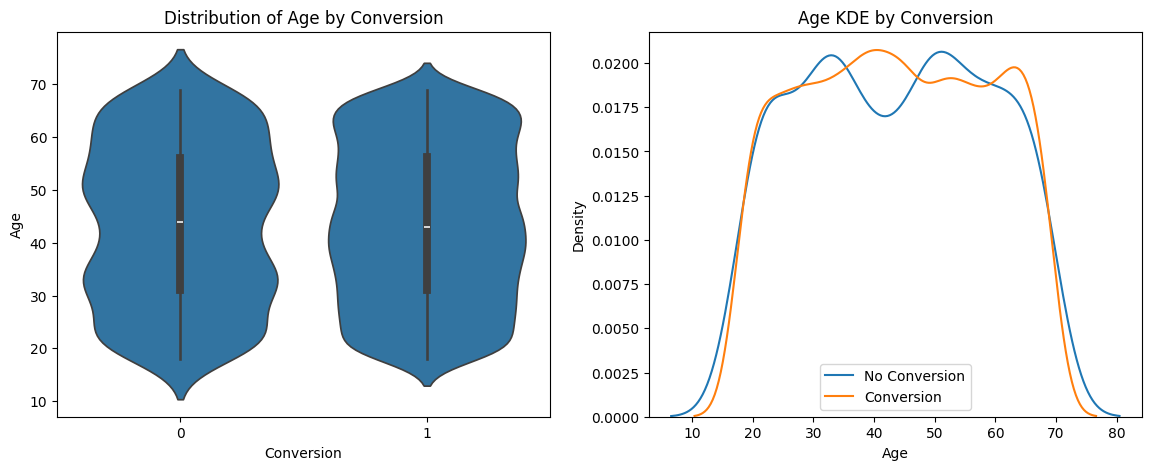

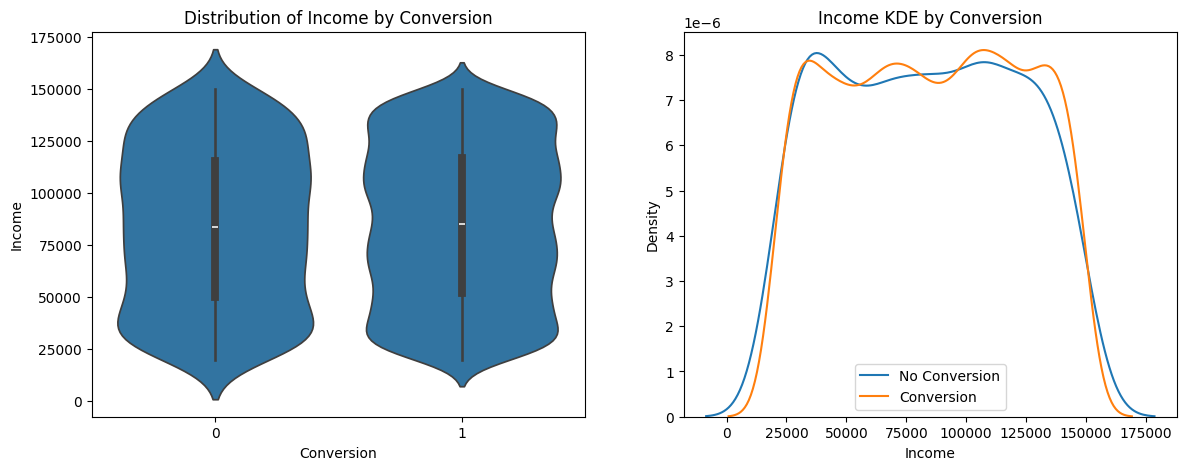

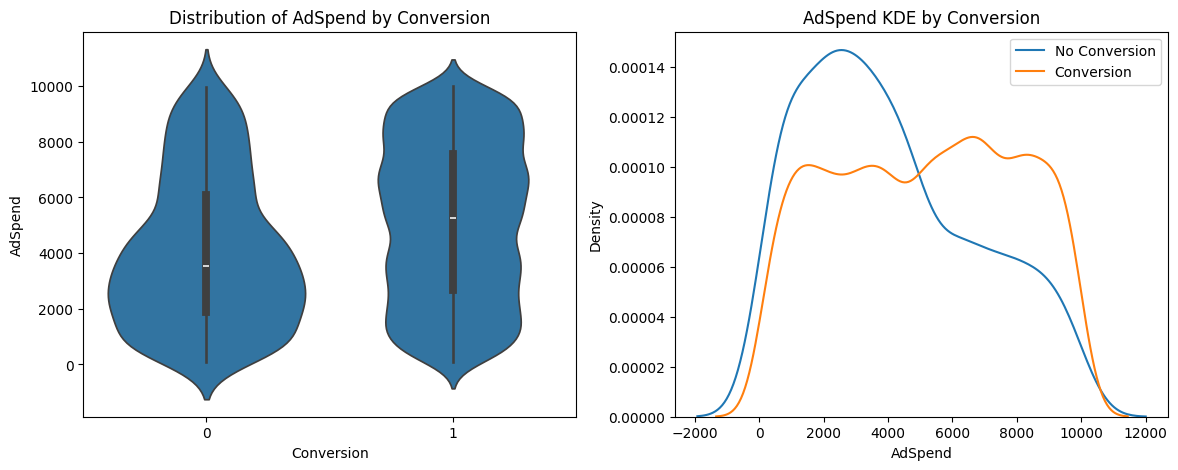

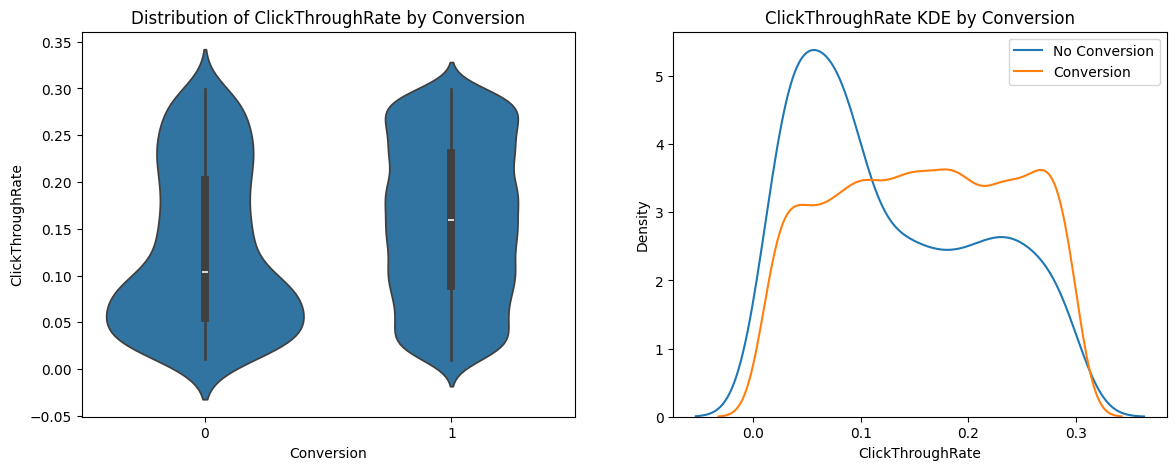

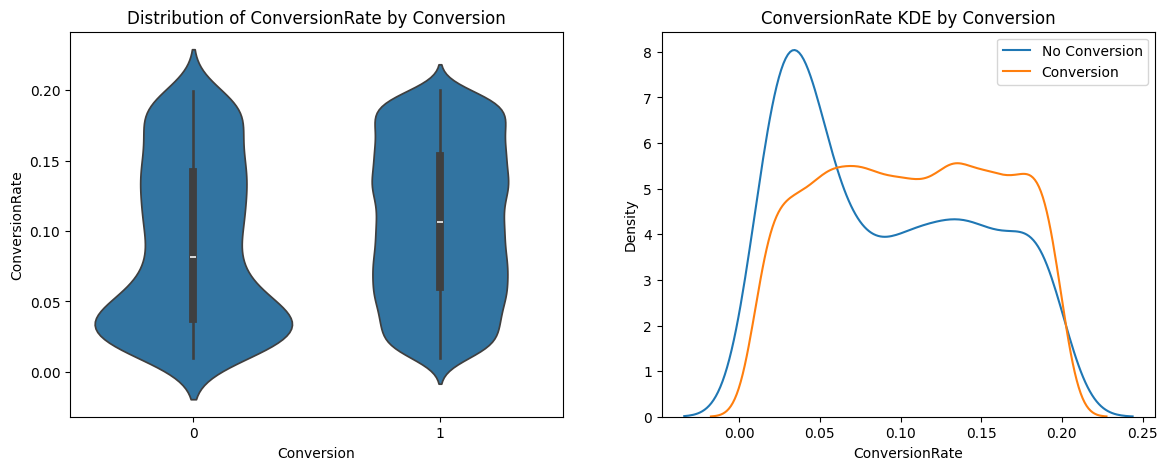

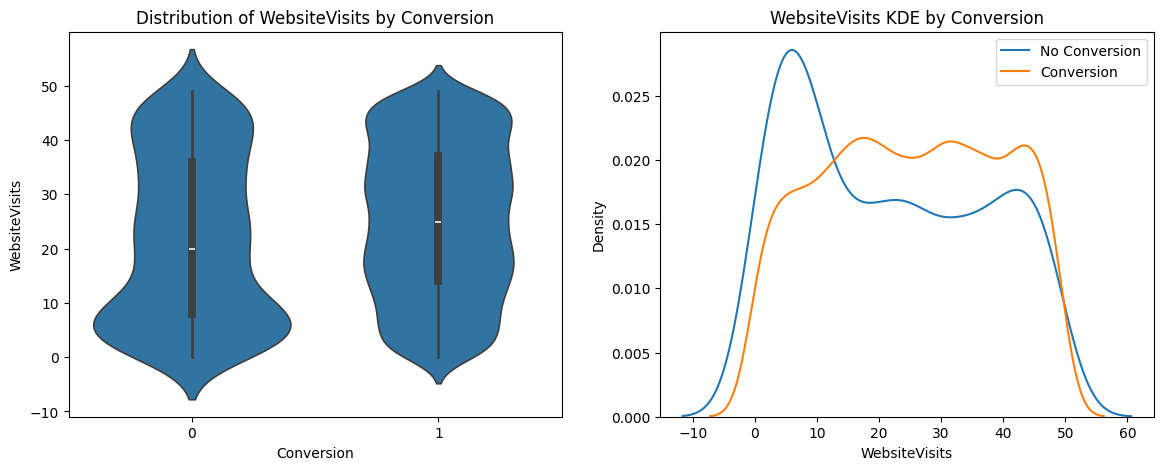

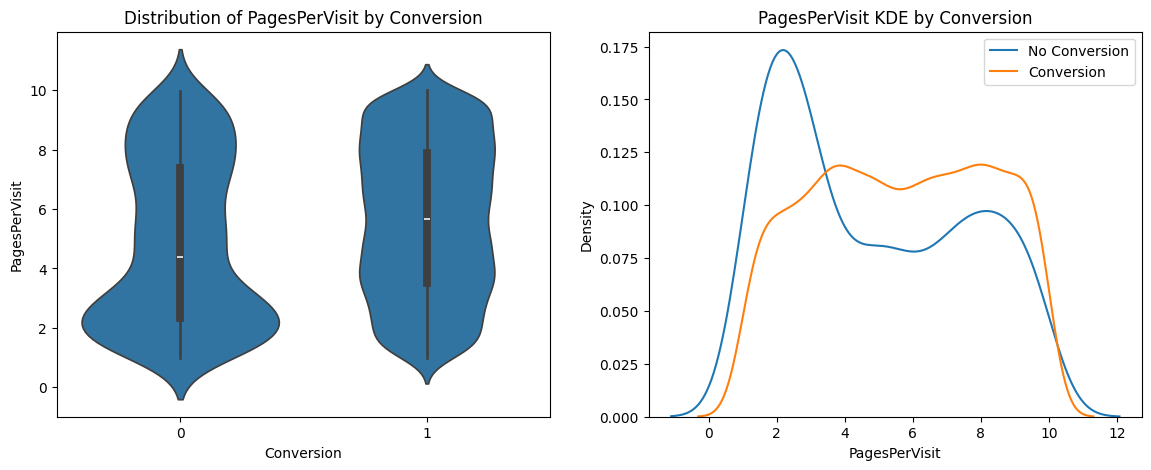

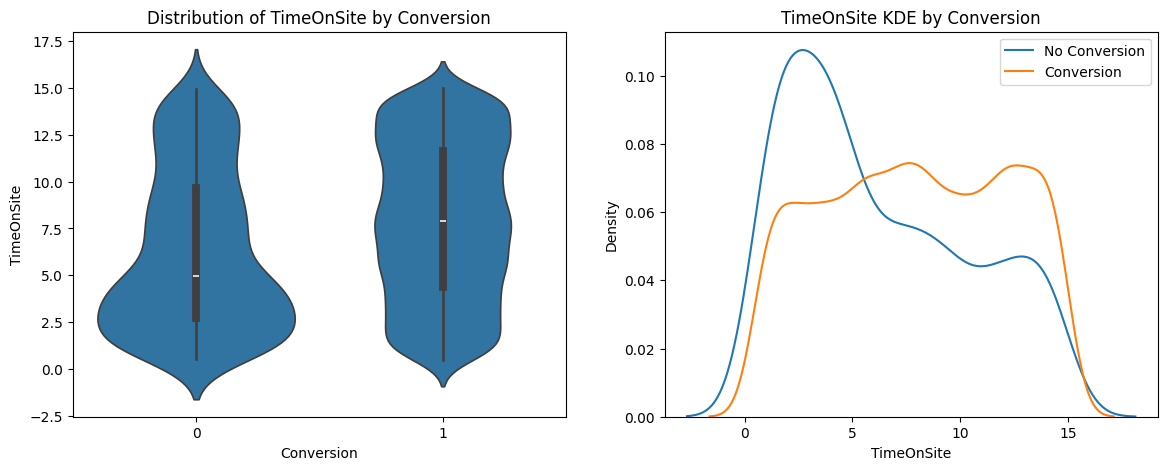

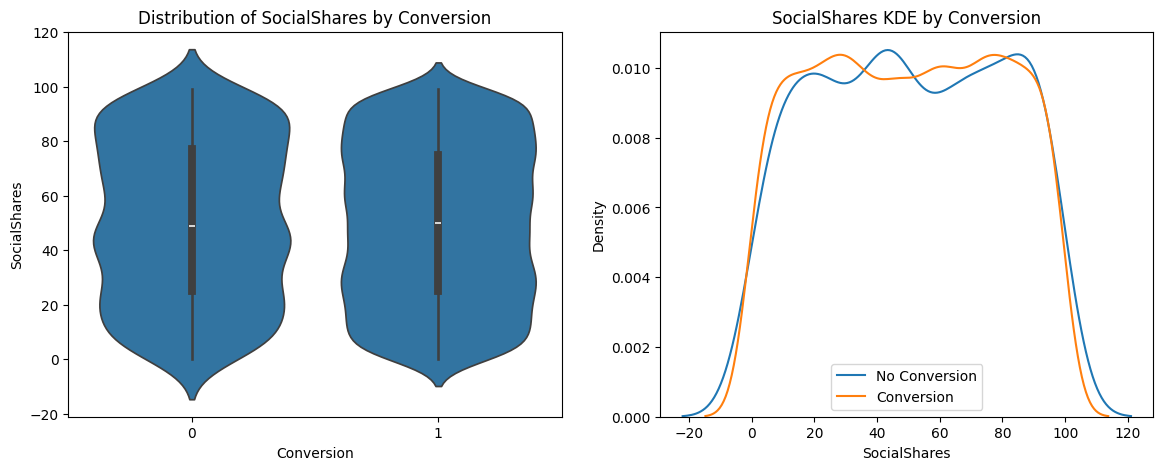

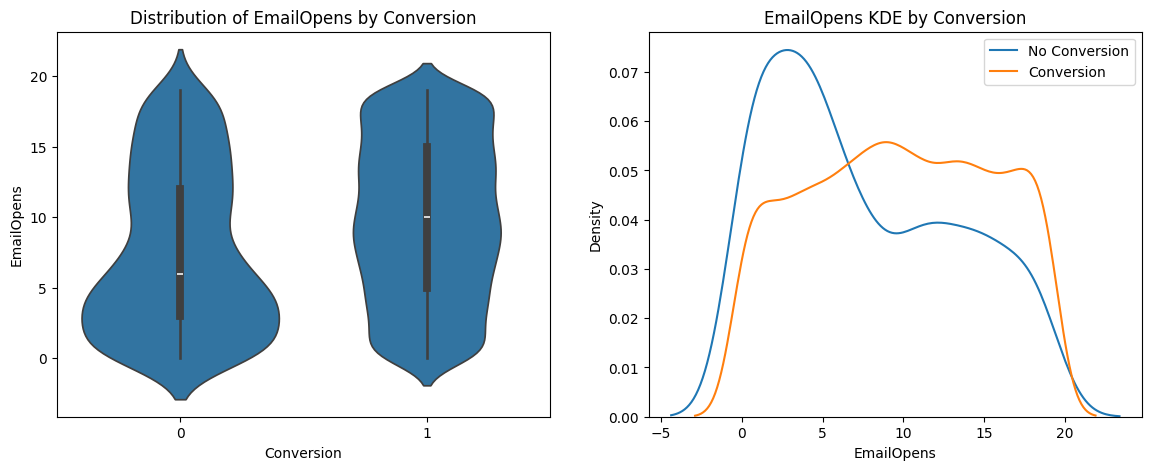

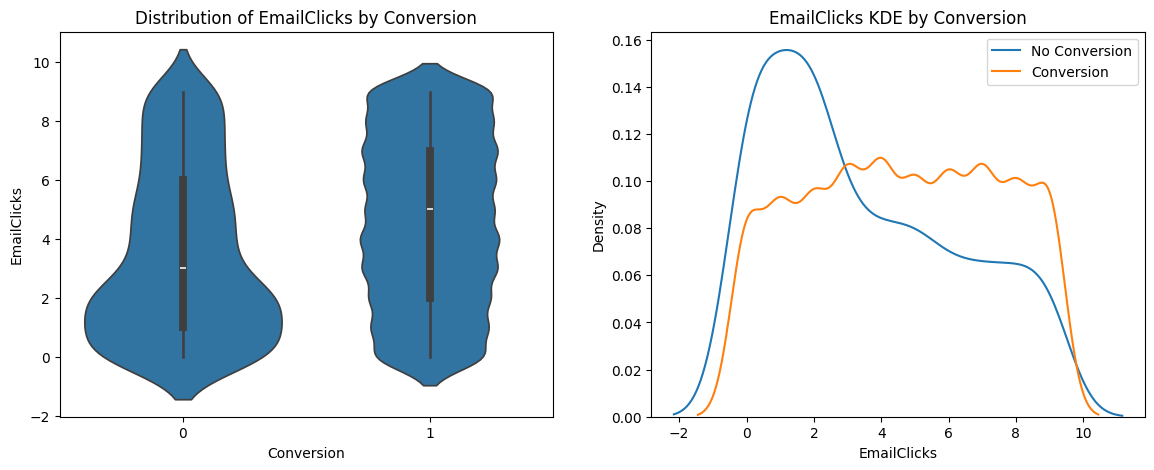

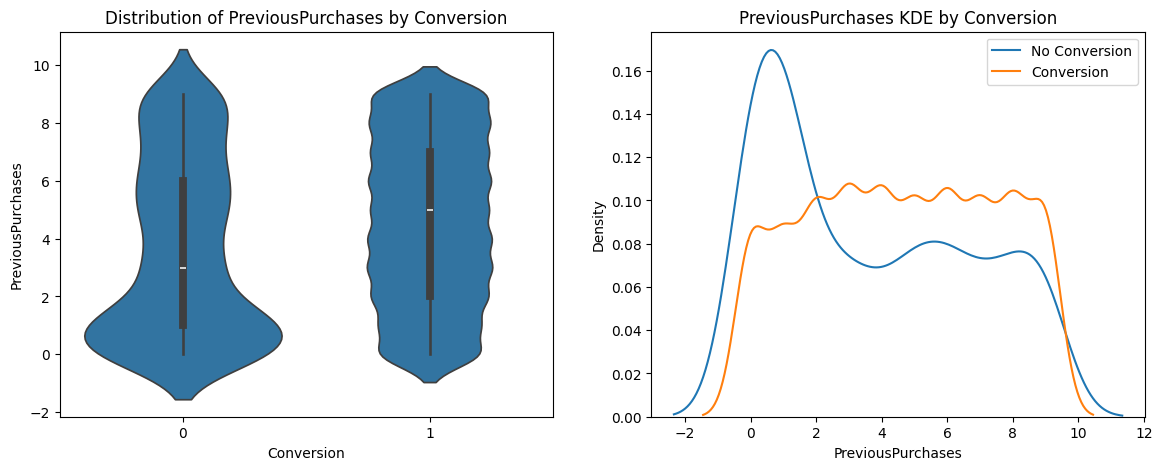

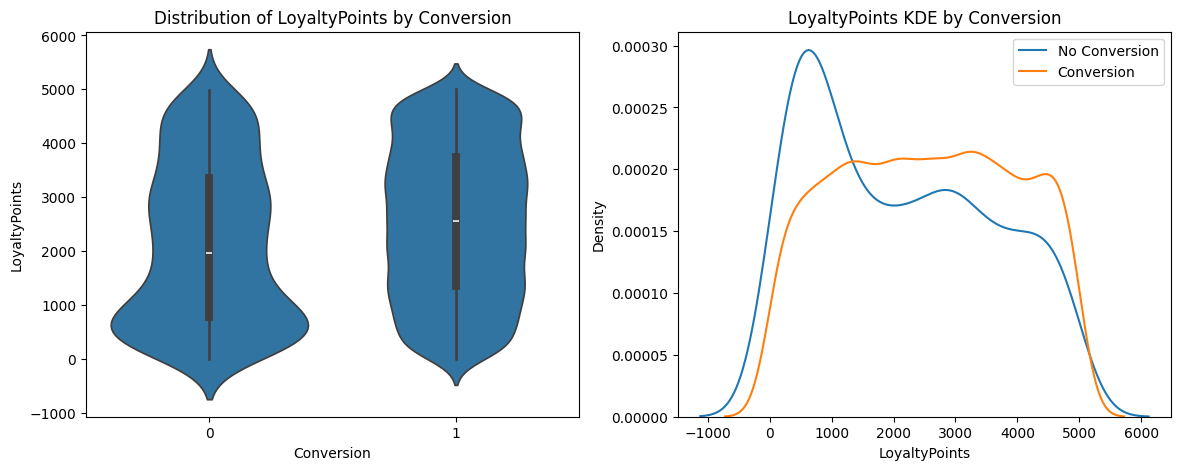

In [36]:
numeric_vars = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
                'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
                'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

for var in numeric_vars:
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    sns.violinplot(x='Conversion', y=var, data=df)
    plt.title(f'Distribution of {var} by Conversion')

    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df[df['Conversion']==0][var], label='No Conversion')
    sns.kdeplot(data=df[df['Conversion']==1][var], label='Conversion')
    plt.title(f'{var} KDE by Conversion')
    plt.xlabel(var)
    plt.legend()

    plt.show()

For Age, Income and SocialShares there doesn't seem to be a significant difference in the distribution between converters and non-converters, suggesting this variable might not be a strong differentiator.

While for the other variables, the distributions vary between converters and non-converters, with the non-converters distribution leaning more normally distributed (with skew and a long tail) and the converters distribution more evenly distributed across all levels.

Now we can look at the correlation by conversion for varibles that are usually related:



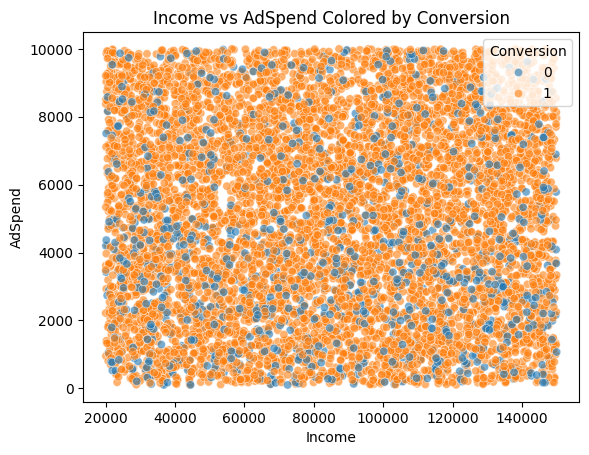

In [37]:
sns.scatterplot(data=df, x='Income', y='AdSpend', hue='Conversion', alpha=0.6)
plt.title('Income vs AdSpend Colored by Conversion')
plt.show()

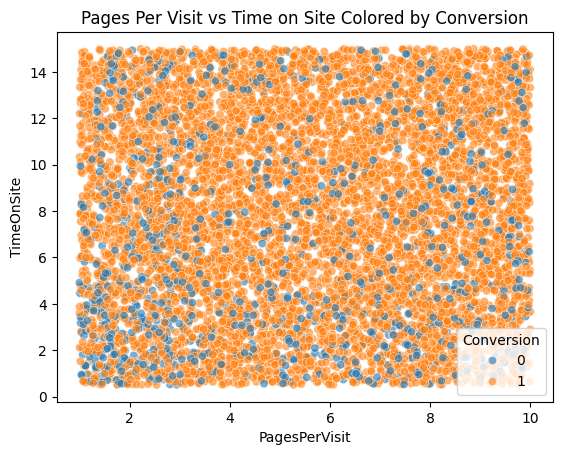

In [38]:
sns.scatterplot(data=df, x='PagesPerVisit', y='TimeOnSite', hue='Conversion', alpha=0.6)
plt.title('Pages Per Visit vs Time on Site Colored by Conversion')
plt.show()

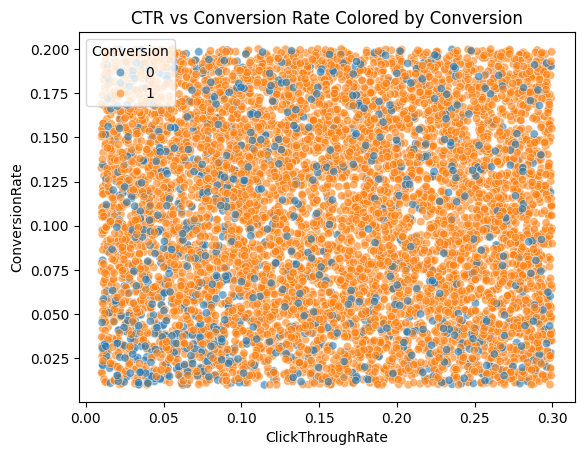

In [39]:
sns.scatterplot(data=df, x='ClickThroughRate', y='ConversionRate', hue='Conversion', alpha=0.6)
plt.title('CTR vs Conversion Rate Colored by Conversion')
plt.show()

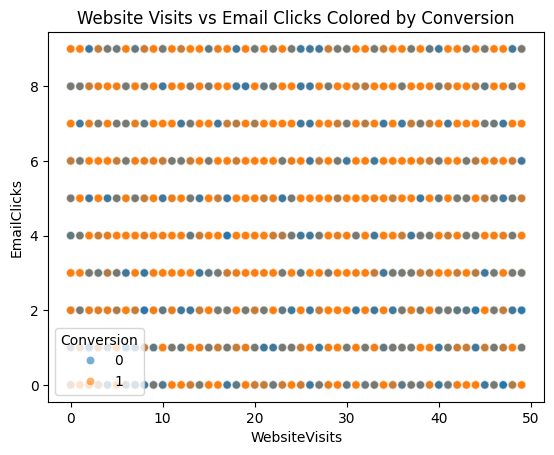

In [40]:
sns.scatterplot(data=df, x='WebsiteVisits', y='EmailClicks', hue='Conversion', alpha=0.6)
plt.title('Website Visits vs Email Clicks Colored by Conversion')
plt.show()

Unfourtunately as our dataset is synthetic, there is no correlation between these variables

### Funnel Analysis

For the Funnel Analysis we will compare the different types of campaigns, using different channels and compare their efficientcy (we will not count the engagment metrics as they measure the overall user engament, not soley for this campaign).

For email campaigns we will follow these steps:
- Email Opened
- Email Clicked
- Visited Website
- Converted

For social media campaigns:
- Social Shares 
- Visited Website
- Converted

For PPC campaigns:
- ClickThroughRate 
- Visited Website
- Converted

In [41]:
channels = df['CampaignChannel'].unique()

channel_funnels = {
    'Email': ['EmailOpens', 'EmailClicks', 'WebsiteVisits', 'Conversion'],
    'Social Media': ['SocialShares', 'WebsiteVisits', 'Conversion'],
    'PPC': ['Clicks', 'WebsiteVisits', 'Conversion'],
}

funnels_by_channel_campaign = {}

for channel in channels:
    funnel_stages = channel_funnels.get(channel)
    if funnel_stages is None:
        print(f"No funnel stages defined for channel '{channel}', skipping.")
        continue

    df_channel = df[df['CampaignChannel'] == channel]
    campaign_types = df_channel['CampaignType'].unique()

    for campaign in campaign_types:
        df_sub = df_channel[df_channel['CampaignType'] == campaign]
        total_users = len(df_sub)

        if channel == 'Email':
            users_stage = [
                (df_sub['EmailOpens'] > 0).sum(),
                (df_sub['EmailClicks'] > 0).sum(),
                (df_sub['WebsiteVisits'] > 0).sum(),
                df_sub['Conversion'].sum()
            ]
        elif channel == 'Social Media':
            users_stage = [
                (df_sub['SocialShares'] > 0).sum(),
                (df_sub['WebsiteVisits'] > 0).sum(),
                df_sub['Conversion'].sum()
            ]
        elif channel == 'PPC':
            users_stage = [
                total_users, 
                (df_sub['WebsiteVisits'] > 0).sum(),
                df_sub['Conversion'].sum()
            ]

        assert len(funnel_stages) == len(users_stage), f"Length mismatch for {channel} {campaign}"

        funnel_df = pd.DataFrame({
            'Stage': funnel_stages,
            'Users': users_stage
        })
        funnel_df['% of Total'] = round(funnel_df['Users'] / total_users * 100, 2)
        funnel_df['Drop from Previous'] = funnel_df['Users'].pct_change().fillna(1).apply(lambda x: round(100 * (1 - x), 2))
        funnel_df['CampaignChannel'] = channel
        funnel_df['CampaignType'] = campaign

        funnels_by_channel_campaign[(channel, campaign)] = funnel_df

engagement_metrics = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite']
engagement_summary = df.groupby(['CampaignChannel', 'CampaignType'])[engagement_metrics].mean().reset_index()

print(engagement_summary)
print(funnels_by_channel_campaign)

No funnel stages defined for channel 'Referral', skipping.
No funnel stages defined for channel 'SEO', skipping.
   CampaignChannel   CampaignType  WebsiteVisits  PagesPerVisit  TimeOnSite
0            Email      Awareness      24.621693       5.724649    7.572267
1            Email  Consideration      26.047146       5.544656    7.662909
2            Email     Conversion      24.158654       5.435843    7.839523
3            Email      Retention      24.672222       5.541225    7.627839
4              PPC      Awareness      25.618932       5.559037    8.003788
5              PPC  Consideration      24.128713       5.544815    7.599237
6              PPC     Conversion      23.252796       5.658691    7.896046
7              PPC      Retention      23.673469       5.438810    7.857392
8         Referral      Awareness      24.113689       5.512115    7.718229
9         Referral  Consideration      24.518428       5.754709    7.741440
10        Referral     Conversion      25.510112   

C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\3955161801.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_summary = df.groupby(['CampaignChannel', 'CampaignType'])[engagement_metrics].mean().reset_index()


C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\617025732.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funnel_df, x='Stage', y='Users', ax=ax, palette='viridis')
C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\617025732.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funnel_df, x='Stage', y='Users', ax=ax, palette='viridis')
C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\617025732.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=funnel_df, x='Stage', y='Users', ax=ax, palette='viridis')
C:\Users\jess6\A

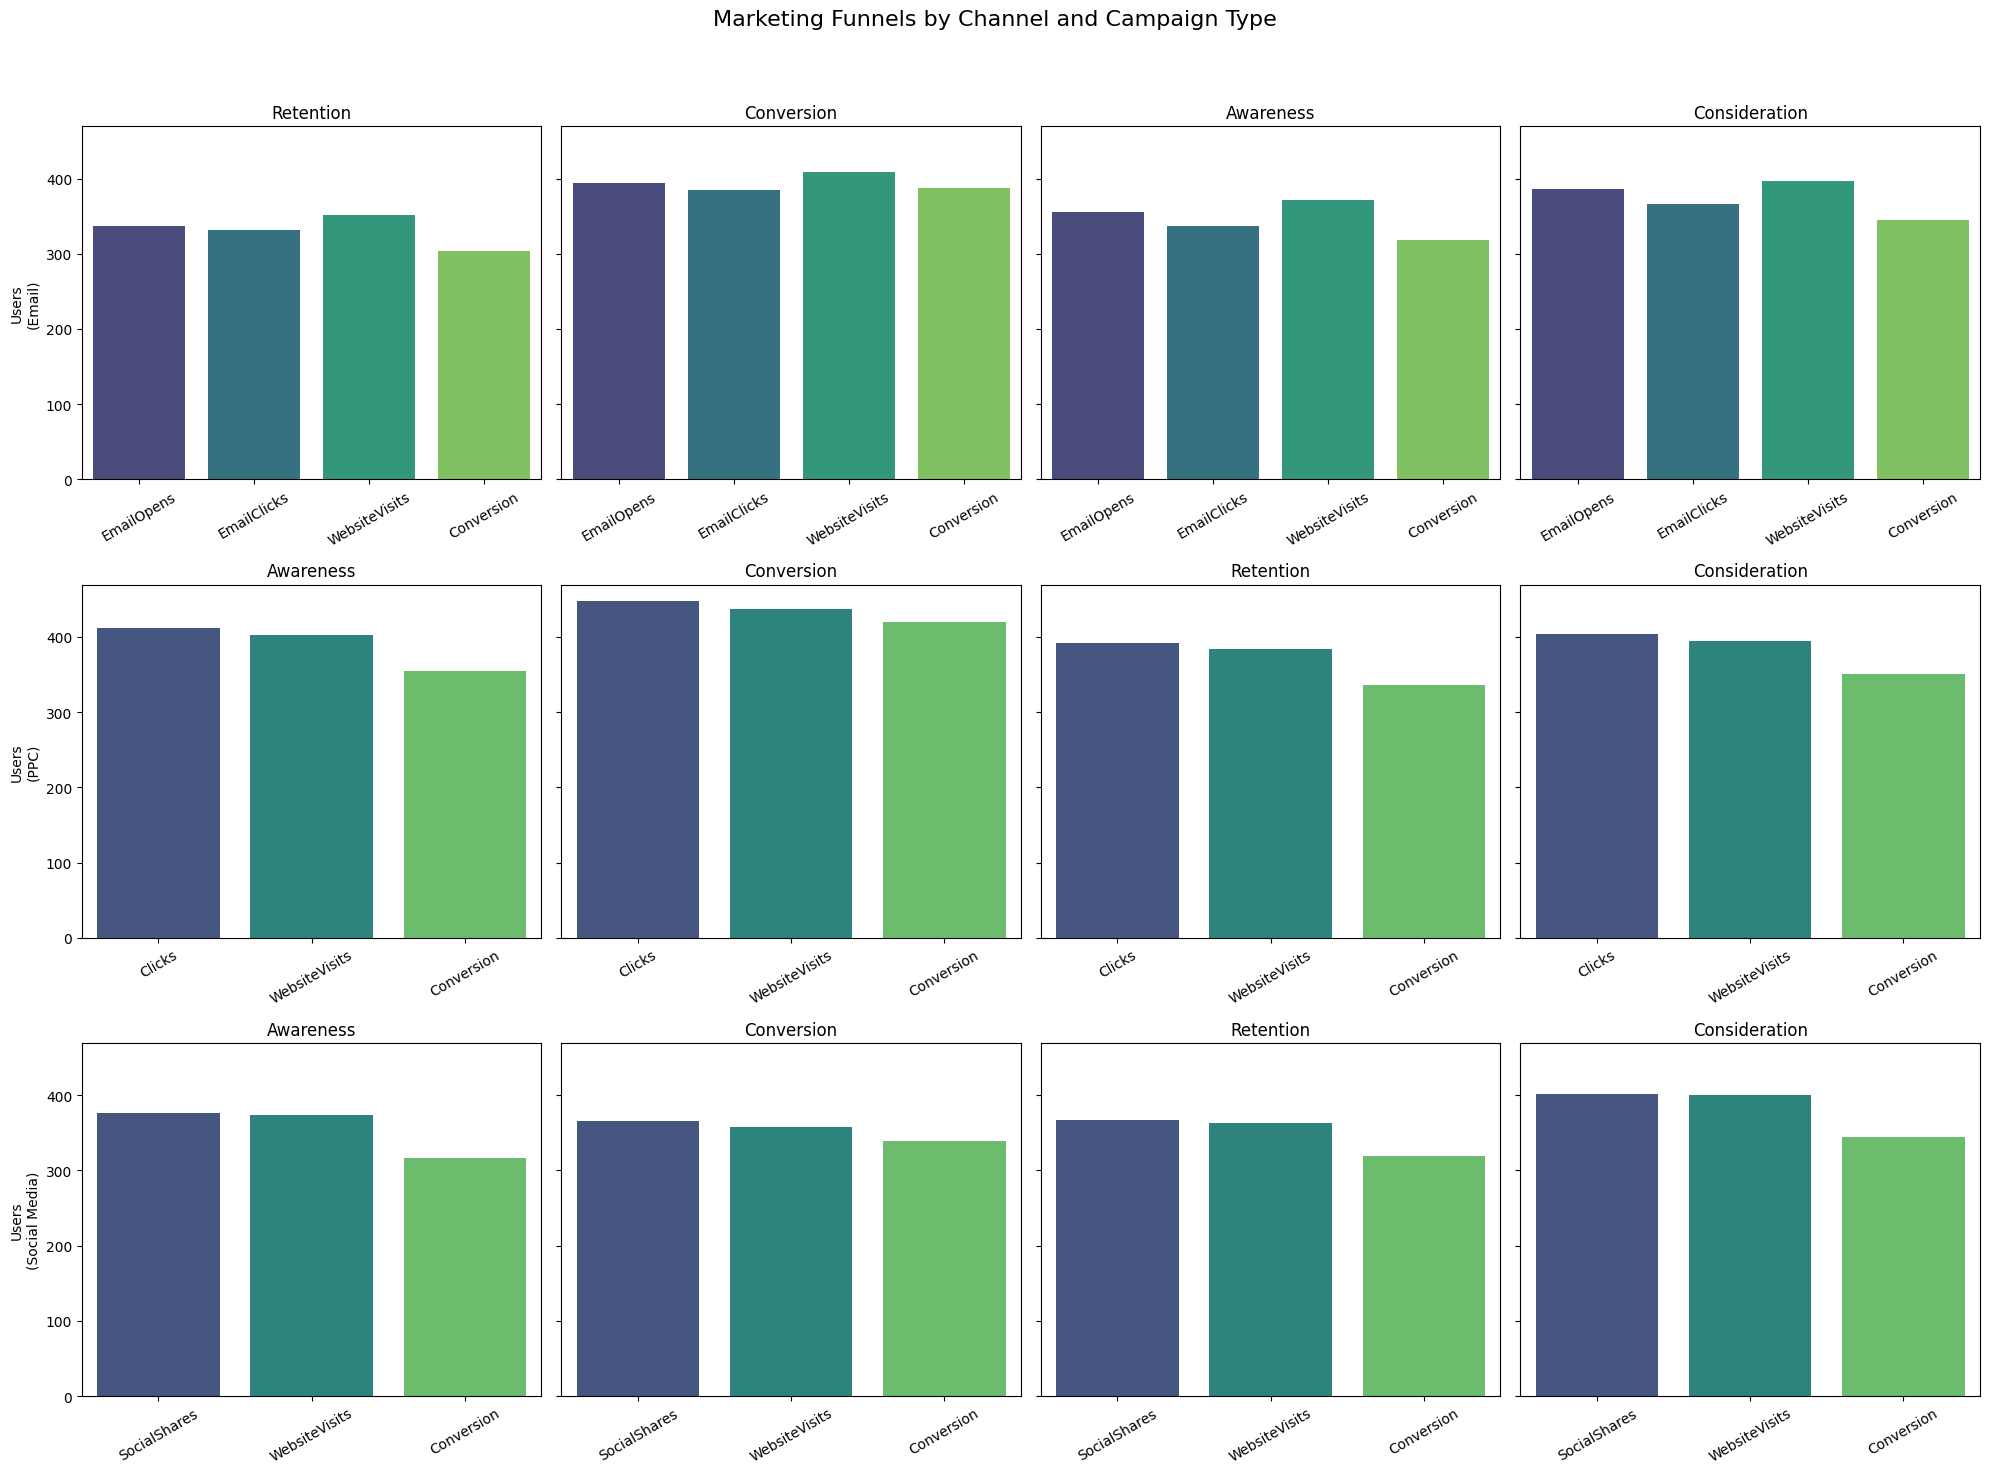

In [42]:
channels = list(set(key[0] for key in funnels_by_channel_campaign.keys()))
campaigns_per_channel = {
    channel: [key[1] for key in funnels_by_channel_campaign.keys() if key[0] == channel]
    for channel in channels
}

n_rows = len(channels)
n_cols = max(len(camps) for camps in campaigns_per_channel.values())

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), sharey=True)

if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)
if n_cols == 1:
    axes = np.expand_dims(axes, axis=1)

for row_idx, channel in enumerate(channels):
    campaigns = campaigns_per_channel[channel]
    for col_idx in range(n_cols):
        ax = axes[row_idx, col_idx]

        if col_idx < len(campaigns):
            campaign = campaigns[col_idx]
            funnel_df = funnels_by_channel_campaign[(channel, campaign)]

            sns.barplot(data=funnel_df, x='Stage', y='Users', ax=ax, palette='viridis')
            ax.set_title(f'{campaign}')
            ax.set_xlabel('')
            if col_idx == 0:
                ax.set_ylabel('Users')
            else:
                ax.set_ylabel('')
            ax.tick_params(axis='x', rotation=30)
        else:
            ax.axis('off')

    axes[row_idx, 0].set_ylabel(f'Users\n({channel})')

plt.suptitle('Marketing Funnels by Channel and Campaign Type', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In terms of user engagement we can notice the following points:

- For website visits, Consideration campaigns generally have slightly higher average website visits across channels, indicating effective engagement before conversion stages.
- For pages per visit, values hover around 5.3 to 5.7, showing fairly consistent user interaction per visit
- For time on site, average time varies between around 7.4 to 8 minutes, with PPC and Social Media Retention campaigns on the higher side, suggesting more engaged visitors.


In terms of the funnel analysis we can notice a few insights:

- Strong initial engagement as nearly all users share socially (~99.7%), with a small drop (~0.8%) moving on to website visits.
- Conversion drop-off as a significant 15% drop occurs between website visits and actual conversions, suggesting this stage needs to be optimized.
- Email campaigns show generally high engagement at the EmailOpens and EmailClicks stages (~90%+), but WebsiteVisits and Conversion rates vary more.
- Retention campaigns tend to have slightly lower users at conversion stage compared to Awareness and Consideration, which is expected as retention focuses on repeat behavior rather than initial acquisition.

Based on these inital innsights a few recommendations can be suggested:

- Optimize conversion stage: across all channels, the largest user drop occurs between WebsiteVisits and Conversion, indicating a need to improve landing page effectiveness, checkout processes, or conversion incentives.
- Leverage high engagement channels: email campaigns with high click and visit rates could be further segmented or personalized to increase conversion.
- Social Media sharing is strong: try boosting calls to action or retargeting users who visit but do not convert.
- Review retention tactics: since retention conversions are lower, explore loyalty programs or follow-up campaigns to maintain engagement.

### A/B Testing

We want to determine which campaign performs better.

From the previous funnel analysis, it seems that Retention campaigns may have a lower conversion rate than Conversion campaigns. Therefore, for each channel, we will test the following one-sided hypothesis:

H0: Retention campaigns convert at the same rate or better than Conversion campaigns

H1: Retention campaigns convert at a lower rate than Conversion campaigns

We will use the Bonferroni correction as we are running three independent hypothesis tests (one per channel), so without correction, we increase the risk of Type I error.


In [43]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

results = []

channels = set(key[0] for key in funnels_by_channel_campaign.keys())

for channel in channels:
    try:
        df_ret = funnels_by_channel_campaign[(channel, 'Retention')]
        df_conv = funnels_by_channel_campaign[(channel, 'Conversion')]

        conv_ret = df_ret[df_ret['Stage'] == 'Conversion']['Users'].values[0]
        visits_ret = df_ret[df_ret['Stage'] == 'WebsiteVisits']['Users'].values[0]

        conv_conv = df_conv[df_conv['Stage'] == 'Conversion']['Users'].values[0]
        visits_conv = df_conv[df_conv['Stage'] == 'WebsiteVisits']['Users'].values[0]

        # Run z-test (one-tailed: Retention < Conversion)
        z_stat, p_one_tailed = proportions_ztest([conv_ret, conv_conv], [visits_ret, visits_conv], alternative='smaller')

        results.append({
            'Channel': channel,
            'Retention_Conversions': conv_ret,
            'Retention_Visits': visits_ret,
            'Conversion_Conversions': conv_conv,
            'Conversion_Visits': visits_conv,
            'Retention Rate': conv_ret / visits_ret,
            'Conversion Rate': conv_conv / visits_conv,
            'Z-Statistic': z_stat,
            'P-Value (One-Tailed)': p_one_tailed,
            'Significant at 0.05': p_one_tailed < 0.05
        })

    except KeyError:
        print(f"Missing Retention or Conversion data for channel: {channel}")
    except IndexError:
        print(f"Incomplete data for channel: {channel}")

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('P-Value (One-Tailed)').reset_index(drop=True)

In [44]:
from statsmodels.stats.multitest import multipletests

results_df['adjusted_p'] = multipletests(results_df['P-Value (One-Tailed)'], method='bonferroni')[1]
results_df['significant_bonferroni'] = results_df['adjusted_p'] < 0.05

print(results_df)

        Channel  Retention_Conversions  Retention_Visits  \
0           PPC                    336               384   
1         Email                    304               351   
2  Social Media                    319               363   

   Conversion_Conversions  Conversion_Visits  Retention Rate  Conversion Rate  \
0                     420                437        0.875000         0.961098   
1                     388                408        0.866097         0.950980   
2                     339                358        0.878788         0.946927   

   Z-Statistic  P-Value (One-Tailed)  Significant at 0.05  adjusted_p  \
0    -4.558851              0.000003                 True    0.000008   
1    -4.109959              0.000020                 True    0.000059   
2    -3.239501              0.000599                 True    0.001796   

   significant_bonferroni  
0                    True  
1                    True  
2                    True  


We conducted a statistical comparison of conversion rates between Retention and Conversion campaigns across three marketing channels: PPC, Email, and Social Media. Using a one-tailed z-test with Bonferroni correction to adjust for multiple comparisons, we evaluated whether the Conversion campaigns outperformed the Retention campaigns in terms of driving user conversions.


Results:

For all three channels, the Conversion campaigns demonstrated a significantly higher conversion rate than Retention campaigns. The differences were statistically significant at the 0.05 level (adjusted p-values < 0.001 for all channels), indicating that these improvements are very unlikely to be due to chance.

The improvements in conversion rate ranged from around 7% to 9%, which is both statistically and practically meaningful in a marketing context.

Statistical Validity:

The z-test assumptions were met, including independent samples, binary conversion outcomes, and sufficiently large sample sizes. We controlled the family-wise error rate using Bonferroni correction (α = 0.05 / 3 tests). Given the very low p-values, these results remain significant even under more stringent significance levels (e.g., α = 0.01).

Recommendations:
- Consider shifting budget and resources toward Conversion campaigns across all channels to maximize user conversions.

Now we want to test if there are signifcant differences between Age, Gender and Income groups for Retention and Conversion campaigns. Therefore, for each group, we will test the same one-sided hypothesis:

H0: Retention campaigns convert at the same rate or better than Conversion campaigns

H1: Retention campaigns convert at a lower rate than Conversion campaigns

We will use also use the Bonferroni correction.


In [45]:
bins_age = [0, 24, 34, 44, 54, 64, 100]
labels_age = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

bins_income = [0, 30000, 60000, 90000, 120000, float('inf')]
labels_income = ['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)
df['IncomeGroup'] = pd.cut(df['Income'], bins=bins_income, labels=labels_income)

df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  ...  TimeOnSite  \
0          0.043919        0.088031              0  ...    7.396803   
1          0.155725        0.182725             42  ...    5.352549   
2          0.277490        0.076423              2  ...   13.794901   
3          0.137611        0.088004             47  ...   14.688363   
4          0.252851        0.109940              0  ...   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

   Conversion  Conversion_label AgeGroup IncomeGroup  
0           1               Yes    55-64        High  
1           1               Yes      65+   Lower-Mid  
2           1               Yes    45-54         Mid  
3           1               Yes    25-34   Lower-Mid  
4           1               Yes    55-64         Mid  

[5 rows x 21 columns]

In [46]:
filtered = df[df['CampaignType'].isin(['Retention', 'Conversion'])]

In [47]:
grouped_gender = filtered.groupby(['Gender', 'CampaignType']).agg(
    conversions=('Conversion', 'sum'),
    visits=('WebsiteVisits', 'count')
).reset_index()

grouped_gender.head()

C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\596192151.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_gender = filtered.groupby(['Gender', 'CampaignType']).agg(


Gender   CampaignType  conversions  visits
0  Female      Awareness            0       0
1  Female  Consideration            0       0
2  Female     Conversion         1212    1287
3  Female      Retention          991    1165
4    Male      Awareness            0       0

In [48]:
pivot = grouped_gender.pivot(index='Gender', columns='CampaignType', values=['conversions', 'visits'])
pivot.columns = [f"{metric}_{camp.lower()[:4]}" for metric, camp in pivot.columns]

pivot = pivot.rename(columns={
    'conversions_conv': 'conv_conv',
    'conversions_rete': 'conv_ret',
    'visits_conv': 'visits_conv',
    'visits_rete': 'visits_ret'
})

pivot = pivot.reset_index()
pivot.head()

Gender  conversions_awar  conversions_cons  conv_conv  conv_ret  \
0  Female                 0                 0       1212       991   
1    Male                 0                 0        727       680   

   visits_awar  visits_cons  visits_conv  visits_ret  
0            0            0         1287        1165  
1            0            0          790         782

In [49]:
pivot = pivot.loc[:, (pivot != 0).any(axis=0)]
pivot

Gender  conv_conv  conv_ret  visits_conv  visits_ret
0  Female       1212       991         1287        1165
1    Male        727       680          790         782

In [50]:
results = []
for _, row in pivot.iterrows():
    count = [row['conv_ret'], row['conv_conv']]
    nobs = [row['visits_ret'], row['visits_conv']]
    z_stat, p_val = proportions_ztest(count, nobs, alternative='smaller')
    results.append({
        'Gender': row['Gender'],
        'z_stat': z_stat,
        'p_value': p_val,
        'significant': p_val < 0.05
    })

results_df = pd.DataFrame(results)

In [51]:
results_df['adjusted_p'] = multipletests(results_df['p_value'], method='bonferroni')[1]
results_df['significant_bonferroni'] = results_df['adjusted_p'] < 0.05

print(results_df)

   Gender    z_stat       p_value  significant    adjusted_p  \
0  Female -7.456485  4.443075e-14         True  8.886150e-14   
1    Male -3.278377  5.220295e-04         True  1.044059e-03   

   significant_bonferroni  
0                    True  
1                    True  


We conducted a gender-based analysis of conversion rates between Retention and Conversion campaigns using a one-tailed z-test. Bonferroni correction was applied to account for multiple hypothesis testing, adjusting the significance threshold accordingly.

Results:

For female users, the Conversion campaign achieved a significantly higher conversion rate compared to the Retention campaign. The z-statistic was -7.46 with an adjusted p-value < 0.0001, well below the Bonferroni-adjusted threshold. For male users, the Conversion campaign also outperformed the Retention campaign. The z-statistic was -3.28 with an adjusted p-value = 0.001, which remains statistically significant after correction.

These results suggest that Conversion campaigns are more effective than Retention campaigns across both gender segments, with the effect being particularly strong among female users.

Statistical Validity:

The z-test assumptions were satisfied: binary outcome variables, independent observations, and sufficiently large sample sizes per gender group. Bonferroni correction was applied to control for the family-wise error rate (α = 0.05 / 2 tests = 0.025).

Recommendations:

For the female segment, given the strong response from female users, marketing efforts may benefit from further personalization within this group to enhance already strong performance.

For male segment, though the effect size is smaller, Conversion campaigns still significantly outperform Retention efforts—continued investment is justified, but deeper exploration into conversion barriers for male users could uncover optimization opportunities.



In [52]:
grouped_age = filtered.groupby(['AgeGroup', 'CampaignType']).agg(
    conversions=('Conversion', 'sum'),
    visits=('WebsiteVisits', 'count')
).reset_index()

grouped_age.head()

C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\3787434605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = filtered.groupby(['AgeGroup', 'CampaignType']).agg(


AgeGroup   CampaignType  conversions  visits
0      <25      Awareness            0       0
1      <25  Consideration            0       0
2      <25     Conversion          244     261
3      <25      Retention          187     221
4    25-34      Awareness            0       0

In [53]:
pivot = grouped_age.pivot(index='AgeGroup', columns='CampaignType', values=['conversions', 'visits'])
pivot.columns = [f"{metric}_{camp.lower()[:4]}" for metric, camp in pivot.columns]

pivot = pivot.rename(columns={
    'conversions_conv': 'conv_conv',
    'conversions_rete': 'conv_ret',
    'visits_conv': 'visits_conv',
    'visits_rete': 'visits_ret'
})

pivot = pivot.reset_index()
pivot.head()

AgeGroup  conversions_awar  conversions_cons  conv_conv  conv_ret  \
0      <25                 0                 0        244       187   
1    25-34                 0                 0        364       325   
2    35-44                 0                 0        399       324   
3    45-54                 0                 0        345       352   
4    55-64                 0                 0        401       322   

   visits_awar  visits_cons  visits_conv  visits_ret  
0            0            0          261         221  
1            0            0          384         380  
2            0            0          422         374  
3            0            0          382         408  
4            0            0          430         375

In [54]:
pivot = pivot.loc[:, (pivot != 0).any(axis=0)]
pivot

AgeGroup  conv_conv  conv_ret  visits_conv  visits_ret
0      <25        244       187          261         221
1    25-34        364       325          384         380
2    35-44        399       324          422         374
3    45-54        345       352          382         408
4    55-64        401       322          430         375
5      65+        186       161          198         189

In [55]:
results = []
for _, row in pivot.iterrows():
    count = [row['conv_ret'], row['conv_conv']]
    nobs = [row['visits_ret'], row['visits_conv']]
    z_stat, p_val = proportions_ztest(count, nobs, alternative='smaller')
    results.append({
        'AgeGroup': row['AgeGroup'],
        'z_stat': z_stat,
        'p_value': p_val,
        'significant': p_val < 0.05
    })

results_df = pd.DataFrame(results)

In [56]:
results_df['adjusted_p'] = multipletests(results_df['p_value'], method='bonferroni')[1]
results_df['significant_bonferroni'] = results_df['adjusted_p'] < 0.05

print(results_df)

  AgeGroup    z_stat   p_value  significant  adjusted_p  \
0      <25 -3.154996  0.000803         True    0.004815   
1    25-34 -4.303539  0.000008         True    0.000050   
2    35-44 -3.863442  0.000056         True    0.000335   
3    45-54 -1.760592  0.039154         True    0.234923   
4    55-64 -3.457531  0.000273         True    0.001635   
5      65+ -2.827751  0.002344         True    0.014063   

   significant_bonferroni  
0                    True  
1                    True  
2                    True  
3                   False  
4                    True  
5                    True  


Next, to further understand campaign effectiveness across customer segments, we conducted a segmented z-test analysis of conversion rates by age group, comparing Conversion and Retention campaigns. A one-tailed z-test was used, and Bonferroni correction was applied to control for multiple testing across six age groups (adjusted α = 0.05 / 6 ≈ 0.0083).

Results:

Significant differences were observed in most age groups:
- Age <25, 25–34, 35–44, 55–64, and 65+ all showed significantly higher conversion rates in the Conversion campaign compared to Retention, with adjusted p-values well below the Bonferroni threshold.
- The 25–34 group demonstrated the strongest effect (z = -4.30, adjusted p < 0.0001), indicating that younger adults in this range responded particularly well to Conversion-focused messaging.
- The 45–54 age group showed a weaker effect (z = -1.76, adjusted p = 0.235), which was not statistically significant after Bonferroni correction.
These results suggest that Conversion campaigns generally outperform Retention campaigns across nearly all age segments, with especially strong performance among younger users.

Statistical Validity:

The analysis meets the z-test assumptions: binary conversion outcome, independent observations, and adequate sample sizes within each age group. Bonferroni correction was applied to maintain control over the family-wise error rate across six comparisons.

Recommendations:
- Focus on younger age groups (<25, 25–34, 35–44), as these groups show the most substantial improvement under Conversion campaigns. Tailoring campaign creatives to their preferences could further enhance performance.
- Monitor 45–54 age group as results were not significant in this group, consider exploring reasons for weaker performance, perhaps misalignment in messaging or offer relevance.
- Include older demographics (55–64, 65+) as despite common assumptions, older users also respond positively to Conversion efforts, so they should not be overlooked in digital targeting strategies.

In [57]:
grouped_income = filtered.groupby(['IncomeGroup', 'CampaignType']).agg(
    conversions=('Conversion', 'sum'),
    visits=('WebsiteVisits', 'count')
).reset_index()

grouped_income.head()

C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\893943728.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_income = filtered.groupby(['IncomeGroup', 'CampaignType']).agg(


IncomeGroup   CampaignType  conversions  visits
0         Low      Awareness            0       0
1         Low  Consideration            0       0
2         Low     Conversion          152     161
3         Low      Retention          137     170
4   Lower-Mid      Awareness            0       0

In [58]:
pivot = grouped_income.pivot(index='IncomeGroup', columns='CampaignType', values=['conversions', 'visits'])
pivot.columns = [f"{metric}_{camp.lower()[:4]}" for metric, camp in pivot.columns]

pivot = pivot.rename(columns={
    'conversions_conv': 'conv_conv',
    'conversions_rete': 'conv_ret',
    'visits_conv': 'visits_conv',
    'visits_rete': 'visits_ret'
})

pivot = pivot.reset_index()
pivot.head()

IncomeGroup  conversions_awar  conversions_cons  conv_conv  conv_ret  \
0         Low                 0                 0        152       137   
1   Lower-Mid                 0                 0        439       370   
2         Mid                 0                 0        465       371   
3   Upper-Mid                 0                 0        463       414   
4        High                 0                 0        420       379   

   visits_awar  visits_cons  visits_conv  visits_ret  
0            0            0          161         170  
1            0            0          465         439  
2            0            0          505         427  
3            0            0          493         478  
4            0            0          453         433

In [59]:
pivot = pivot.loc[:, (pivot != 0).any(axis=0)]
pivot

IncomeGroup  conv_conv  conv_ret  visits_conv  visits_ret
0         Low        152       137          161         170
1   Lower-Mid        439       370          465         439
2         Mid        465       371          505         427
3   Upper-Mid        463       414          493         478
4        High        420       379          453         433

In [60]:
results = []
for _, row in pivot.iterrows():
    count = [row['conv_ret'], row['conv_conv']]
    nobs = [row['visits_ret'], row['visits_conv']]
    z_stat, p_val = proportions_ztest(count, nobs, alternative='smaller')
    results.append({
        'IncomeGroup': row['IncomeGroup'],
        'z_stat': z_stat,
        'p_value': p_val,
        'significant': p_val < 0.05
    })

results_df = pd.DataFrame(results)

In [61]:
results_df['adjusted_p'] = multipletests(results_df['p_value'], method='bonferroni')[1]
results_df['significant_bonferroni'] = results_df['adjusted_p'] < 0.05

print(results_df)

  IncomeGroup    z_stat       p_value  significant  adjusted_p  \
0         Low -3.776064  7.966296e-05         True    0.000398   
1   Lower-Mid -4.961933  3.489752e-07         True    0.000002   
2         Mid -2.599128  4.673052e-03         True    0.023365   
3   Upper-Mid -3.848042  5.953278e-05         True    0.000298   
4        High -2.593223  4.754057e-03         True    0.023770   

   significant_bonferroni  
0                    True  
1                    True  
2                    True  
3                    True  
4                    True  


To assess whether campaign effectiveness varied by income level, we performed segmented one-tailed z-tests comparing Conversion and Retention campaigns' performance across five income groups. A Bonferroni correction was applied to adjust for multiple testing (α = 0.05 / 5 = 0.01).

Results:

All five income groups showed statistically significant improvements in conversion rates under the Conversion campaign relative to the Retention campaign:
- The Lower-Mid income group showed the strongest effect (z = -4.96, adjusted p < 0.00001), suggesting that Conversion campaigns are particularly effective among this segment.
- The Low, Upper-Mid, and High income groups also demonstrated significant improvements, with adjusted p-values below the Bonferroni threshold.
- The Mid income group had the weakest effect (z = -2.60, adjusted p ≈ 0.023), but it still met the significance threshold, indicating that the improvement is unlikely due to chance.

These findings suggest that Conversion campaigns consistently outperform Retention campaigns across all income tiers, with especially notable performance in the Lower-Mid and Upper-Mid brackets.

Statistical Validity:

All z-test assumptions were met, the outcome was binary (converted or not), observations were independent, and sample sizes were adequate. Bonferroni correction ensured control over the family-wise error rate across the five tests.

Recommendations:

- Prioritize Lower-Mid and Upper-Mid Segments as these groups are especially responsive to Conversion campaigns. Customized messaging and offers tailored to these brackets may yield even higher returns.
- Maintain Broad Campaign Coverage, as all income groups showed statistically significant improvements, Conversion campaigns appear broadly effective and should be maintained across income tiers.
- Explore Mid and High Income Segments Further, as even though results are significant, the effects were smaller, so we could consider qualitative or behavioral insights to further optimize outreach strategies for these demographics.

Now we will perform different Anova tests to assess whether conversion rates vary significantly across different demographic segments for each campaign type


In [62]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_subset = df[['AgeGroup', 'Gender', 'IncomeGroup', 'CampaignType', 'Conversion']]
df_subset.head()

AgeGroup  Gender IncomeGroup CampaignType  Conversion
0    55-64  Female        High    Awareness           1
1      65+    Male   Lower-Mid    Retention           1
2    45-54  Female         Mid    Awareness           1
3    25-34  Female   Lower-Mid   Conversion           1
4    55-64  Female         Mid   Conversion           1

In [63]:
df_conv = df_subset[df_subset['CampaignType'] == 'Conversion'].copy()
df_conv.head()

AgeGroup  Gender IncomeGroup CampaignType  Conversion
3     25-34  Female   Lower-Mid   Conversion           1
4     55-64  Female         Mid   Conversion           1
7     55-64  Female   Lower-Mid   Conversion           1
12    35-44    Male        High   Conversion           1
16      <25  Female         Low   Conversion           1

In [64]:
groups = [group['Conversion'].values for name, group in df_conv.groupby('AgeGroup')]
f_stat_age, p_val_age = f_oneway(*groups)

groups = [group['Conversion'].values for name, group in df_conv.groupby('Gender')]
f_stat_gender, p_val_gender = f_oneway(*groups)

groups = [group['Conversion'].values for name, group in df_conv.groupby('IncomeGroup')]
f_stat_income, p_val_income = f_oneway(*groups)

print(f"Age Group ANOVA: F = {f_stat_age:.4f}, p = {p_val_age:.4e}")
print(f"Gender ANOVA:   F = {f_stat_gender:.4f}, p = {p_val_gender:.4e}")
print(f"Income Group ANOVA: F = {f_stat_income:.4f}, p = {p_val_income:.4e}")

Age Group ANOVA: F = 1.6150, p = 1.5269e-01
Gender ANOVA:   F = 3.6414, p = 5.6499e-02
Income Group ANOVA: F = 0.7478, p = 5.5940e-01


C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\2128760635.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['Conversion'].values for name, group in df_conv.groupby('AgeGroup')]
C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\2128760635.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['Conversion'].values for name, group in df_conv.groupby('Gender')]
C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\2128760635.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current

In [65]:
tukey_age = pairwise_tukeyhsd(endog=df_conv['Conversion'], groups=df_conv['AgeGroup'], alpha=0.05)
print(tukey_age.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 25-34  35-44  -0.0024    1.0 -0.0525 0.0477  False
 25-34  45-54  -0.0448 0.1277 -0.0961 0.0065  False
 25-34  55-64  -0.0154 0.9516 -0.0652 0.0345  False
 25-34    65+  -0.0085 0.9988 -0.0706 0.0536  False
 25-34    <25  -0.0131 0.9868   -0.07 0.0439  False
 35-44  45-54  -0.0424 0.1533 -0.0925 0.0078  False
 35-44  55-64  -0.0129 0.9743 -0.0616 0.0357  False
 35-44    65+  -0.0061 0.9997 -0.0673 0.0551  False
 35-44    <25  -0.0106 0.9944 -0.0665 0.0453  False
 45-54  55-64   0.0294 0.5447 -0.0205 0.0793  False
 45-54    65+   0.0363 0.5565 -0.0259 0.0984  False
 45-54    <25   0.0317 0.6073 -0.0253 0.0887  False
 55-64    65+   0.0068 0.9996 -0.0541 0.0678  False
 55-64    <25   0.0023    1.0 -0.0534  0.058  False
   65+    <25  -0.0045    1.0 -0.0714 0.0624  False
---------------------------------------------------


In [66]:
tukey_income = pairwise_tukeyhsd(endog=df_conv['Conversion'], groups=df_conv['IncomeGroup'], alpha=0.05)
print(tukey_income.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
     High       Low   0.0169 0.9468 -0.0455 0.0794  False
     High Lower-Mid   0.0169 0.8418  -0.028 0.0618  False
     High       Mid  -0.0064 0.9949 -0.0504 0.0377  False
     High Upper-Mid    0.012 0.9472 -0.0323 0.0563  False
      Low Lower-Mid     -0.0    1.0 -0.0622 0.0622  False
      Low       Mid  -0.0233 0.8399 -0.0849 0.0383  False
      Low Upper-Mid   -0.005 0.9995 -0.0667 0.0568  False
Lower-Mid       Mid  -0.0233 0.5923  -0.067 0.0204  False
Lower-Mid Upper-Mid  -0.0049 0.9981 -0.0489  0.039  False
      Mid Upper-Mid   0.0184 0.7722 -0.0247 0.0614  False
---------------------------------------------------------


In [67]:
tukey_gender = pairwise_tukeyhsd(endog=df_conv['Conversion'], groups=df_conv['Gender'], alpha=0.05)
print(tukey_gender.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Female   Male  -0.0215 0.0565 -0.0435 0.0006  False
---------------------------------------------------


We conducted separate one-way ANOVA tests for each campaign type and for each of the following factors: Age Group, Gender, and Income Group. For any ANOVA result approaching significance, we followed up with Tukey's Honest Significant Difference (HSD) test to explore specific pairwise differences between subgroups.

Results:

- For Age and Income Group there is no statistically significant difference in mean conversion rates across age groups, which was confirmed by Tukey HSD for all campaign types.
- For Gender, results are borderline, narrowly missing the conventional 0.05 significance threshold, which suggests there may be a weak signal suggesting higher conversion rates among males, but the difference was not statistically significant after adjustment.
- Overall there is no statistically significant difference in mean conversion rates across these groups for all different types of campaigns. This conclusion may seem strange and perhaps this is due to the fact that the dataset uses synthetic data.

Statistical Validity:

ANOVA assumptions were met: the dependent variable (conversion rate) was continuous and approximately normally distributed within groups, with independent observations. Tukey's HSD test controlled the family-wise error rate during multiple comparisons. Sample sizes were sufficient for all major subgroups.

Recommendations:
- Monitor Gender trends cautiously, enven though not statistically significant, the near-threshold result hints at a possible gender-based difference in conversion response. This could warrant A/B testing or segmentation in future campaigns.
- Focus on behavioral or contextual segmentation instead, which may offer stronger explanatory power than basic demographics in this dataset.


### Customer Segmentation

Now we want to discover which customers are more likely to convert and identify different customer profiles.

We want to segment customers to identify groups with distinct conversion behaviors, and characterize high-converting customer profiles.



In [ ]:
df['EmailEngagement'] = df['EmailClicks'] / df['EmailOpens'].replace(0, np.nan)
df['EmailEngagement'] = df['EmailEngagement'].fillna(0)
df['AvgSpendPerVisit'] = df['AdSpend'] / df['WebsiteVisits'].replace(0, np.nan)
df['AvgSpendPerVisit'] = df['AvgSpendPerVisit'].fillna(0)
df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  ...  EmailOpens  \
0          0.043919        0.088031              0  ...           6   
1          0.155725        0.182725             42  ...           2   
2          0.277490        0.076423              2  ...          11   
3          0.137611        0.088004             47  ...           2   
4          0.252851        0.109940              0  ...           6   

   EmailClicks  PreviousPurchases  LoyaltyPoints  Conversion  \
0            9                  4            688           1   
1            7                  2           3459           1   
2            2                  8           2337           1   
3            2                  0           2463           1   
4            6                  8           4345           1   

   Conversion_label  AgeGroup  IncomeGroup EmailEngagement AvgSpendPerVisit  
0               Yes     55-64         High        1.500000         0.000000  
1               Yes       65+    Lower-Mid        3.500000        92.825443  
2               Yes     45-54          Mid        0.181818       773.214798  
3               Yes     25-34    Lower-Mid        1.000000        11.479275  
4               Yes     55-64          Mid        1.000000         0.000000  

[5 rows x 23 columns]

In [69]:
from sklearn.preprocessing import MinMaxScaler

engagement_features = ['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'SocialShares']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[engagement_features])

weights = np.array([0.2, 0.15, 0.3, 0.15, 0.2])
df['EngagementScore'] = np.dot(df_scaled, weights) #we create a new engagment score feature as a weighted sum of the engagment features
df.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  ...  EmailClicks  \
0          0.043919        0.088031              0  ...            9   
1          0.155725        0.182725             42  ...            7   
2          0.277490        0.076423              2  ...            2   
3          0.137611        0.088004             47  ...            2   
4          0.252851        0.109940              0  ...            6   

   PreviousPurchases  LoyaltyPoints  Conversion  Conversion_label  AgeGroup  \
0                  4            688           1               Yes     55-64   
1                  2           3459           1               Yes       65+   
2                  8           2337           1               Yes     45-54   
3                  0           2463           1               Yes     25-34   
4                  8           4345           1               Yes     55-64   

   IncomeGroup  EmailEngagement AvgSpendPerVisit EngagementScore  
0         High         1.500000         0.000000        0.251786  
1    Lower-Mid         3.500000        92.825443        0.329676  
2          Mid         0.181818       773.214798        0.490563  
3    Lower-Mid         1.000000        11.479275        0.740088  
4          Mid         1.000000         0.000000        0.356194  

[5 rows x 24 columns]

In [115]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

relevant_fetures = ['Age', 'Gender', 'Income', 'PagesPerVisit', 'TimeOnSite', 'WebsiteVisits', 'EmailOpens', 'EmailEngagement', 'SocialShares', 
                    'ClickThroughRate', 'EngagementScore', 'AvgSpendPerVisit', 'PreviousPurchases', 'LoyaltyPoints', 'AdSpend', 'CampaignChannel', 'CampaignType', 'Conversion']

clustering_df = df[relevant_fetures].copy()

conversion_labels = clustering_df.pop('Conversion')
clustering_df.head()

Age  Gender  Income  PagesPerVisit  TimeOnSite  WebsiteVisits  EmailOpens  \
0   56  Female  136912       2.399017    7.396803              0           6   
1   69    Male   41760       2.917138    5.352549             42           2   
2   46  Female   88456       8.223619   13.794901              2          11   
3   32  Female   44085       4.540939   14.688363             47           2   
4   60  Female   83964       2.046847   13.993370              0           6   

   EmailEngagement  SocialShares  ClickThroughRate  EngagementScore  \
0         1.500000            19          0.043919         0.251786   
1         3.500000             5          0.155725         0.329676   
2         0.181818             0          0.277490         0.490563   
3         1.000000            89          0.137611         0.740088   
4         1.000000             6          0.252851         0.356194   

   AvgSpendPerVisit  PreviousPurchases  LoyaltyPoints      AdSpend  \
0          0.000000                  4            688  6497.870068   
1         92.825443                  2           3459  3898.668606   
2        773.214798                  8           2337  1546.429596   
3         11.479275                  0           2463   539.525936   
4          0.000000                  8           4345  1678.043573   

  CampaignChannel CampaignType  
0    Social Media    Awareness  
1           Email    Retention  
2             PPC    Awareness  
3             PPC   Conversion  
4             PPC   Conversion

In [116]:
numeric_features = ['Age', 'Income', 'PagesPerVisit', 'TimeOnSite', 'WebsiteVisits', 'EmailOpens', 'EmailEngagement', 'SocialShares', 'ClickThroughRate', 'EngagementScore', 'AvgSpendPerVisit', 'PreviousPurchases', 'LoyaltyPoints', 'AdSpend']
categorical_features = ['Gender', 'CampaignChannel', 'CampaignType']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

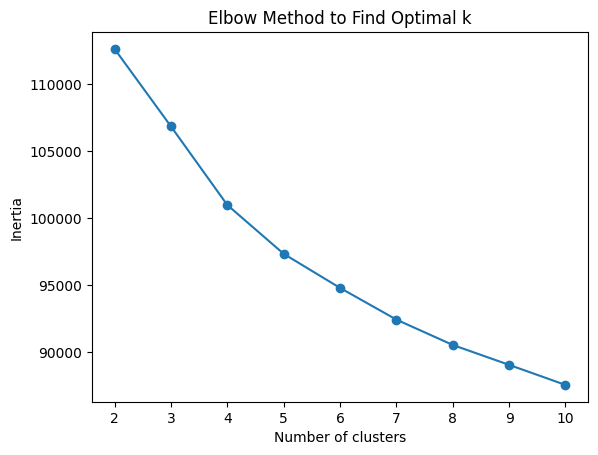

In [117]:
X_processed = preprocessor.fit_transform(clustering_df)

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()

The optimal number of clusters seem to be around 4

In [118]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

clustering_methods = {
    'KMeans': KMeans,
    'Agglomerative': AgglomerativeClustering
}

range_k = range(3, 6)

best_score = -1
best_method = None
best_k = None
best_labels = None

for k in range_k:
    for name, Clusterer in clustering_methods.items():
        clusterer = Clusterer(n_clusters=k)
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('clusterer', clusterer)
        ])
        labels = pipeline.fit_predict(clustering_df)
        transformed_data = preprocessor.fit_transform(clustering_df)
        score = silhouette_score(transformed_data, labels)
        print(f"{name} with k={k} Silhouette Score: {score:.4f}")
        
        if score > best_score:
            best_score = score
            best_method = name
            best_k = k
            best_labels = labels

print(f"\nBest clustering method: {best_method} with k={best_k} (Silhouette Score = {best_score:.4f})")

KMeans with k=3 Silhouette Score: 0.0904
Agglomerative with k=3 Silhouette Score: 0.1980
KMeans with k=4 Silhouette Score: 0.0937
Agglomerative with k=4 Silhouette Score: 0.0583
KMeans with k=5 Silhouette Score: 0.0711
Agglomerative with k=5 Silhouette Score: 0.0255

Best clustering method: Agglomerative with k=3 (Silhouette Score = 0.1980)


In [119]:
range_k = range(3, 6)
best_gmm_score = -1
best_gmm_k = None
best_gmm_labels = None

transformed_data = preprocessor.fit_transform(clustering_df)

for k in range_k:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(transformed_data)
    labels = gmm.predict(transformed_data)
    score = silhouette_score(transformed_data, labels)
    print(f"GMM with k={k} Silhouette Score: {score:.4f}")
    
    if score > best_gmm_score:
        best_gmm_score = score
        best_gmm_k = k
        best_gmm_labels = labels

print(f"\nBest GMM clustering: k={best_gmm_k} (Silhouette Score = {best_gmm_score:.4f})")

GMM with k=3 Silhouette Score: 0.0550
GMM with k=4 Silhouette Score: 0.0489
GMM with k=5 Silhouette Score: 0.0298

Best GMM clustering: k=3 (Silhouette Score = 0.0550)


In [120]:
eps_values = np.linspace(0.2, 2.0, 10)
min_samples_values = [3, 5, 10]

best_db_score = -1
best_db_params = None
best_db_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(transformed_data)

        # DBSCAN can assign -1 as noise; skip if only one cluster is found
        if len(set(labels)) <= 1 or (len(set(labels)) == 2 and -1 in labels):
            continue

        score = silhouette_score(transformed_data, labels)
        print(f"DBSCAN with eps={eps}, min_samples={min_samples} Silhouette Score: {score:.4f}")

        if score > best_db_score:
            best_db_score = score
            best_db_params = (eps, min_samples)
            best_db_labels = labels

if best_db_params:
    print(f"\nBest DBSCAN: eps={best_db_params[0]}, min_samples={best_db_params[1]} (Silhouette Score = {best_db_score:.4f})")
else:
    print("\nDBSCAN did not find valid clusters for given parameters.")

DBSCAN with eps=1.8, min_samples=3 Silhouette Score: -0.2857
DBSCAN with eps=2.0, min_samples=3 Silhouette Score: -0.3517
DBSCAN with eps=2.0, min_samples=5 Silhouette Score: -0.2136

Best DBSCAN: eps=2.0, min_samples=5 (Silhouette Score = -0.2136)


KMeans and GMM performed badly likely due to poor cluster separability, overlap in feature distributions and non-spherical clusters (as KMeans assumes spherical clusters).

DBSCAN gave terrible results and wrong clusters, likely due to either high dimensionality, unclear density-based structure or too many noise points labeled as -1.

Overall, Agglomerative clustering seems to work best (even though the silhouette score is still low) likely due to it being hierarchical, which is more suited for when we have nested clusters (like different customer tiers).

Now we can have a look at cluster seperation using dimension reductionality methods: PCA and t-SNE

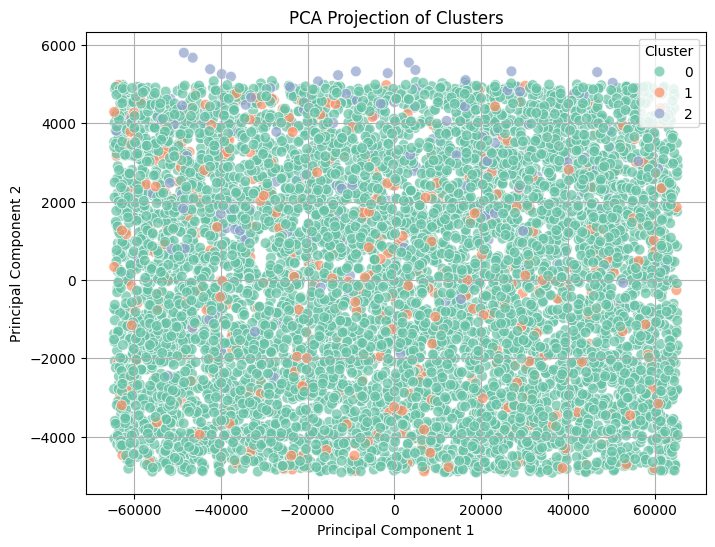

In [123]:
from sklearn.decomposition import PCA

X = clustering_df.select_dtypes(include='number')

pca = PCA(n_components=2)
components = pca.fit_transform(X)

pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = best_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60, alpha=0.7)
plt.title('PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

C:\Users\jess6\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


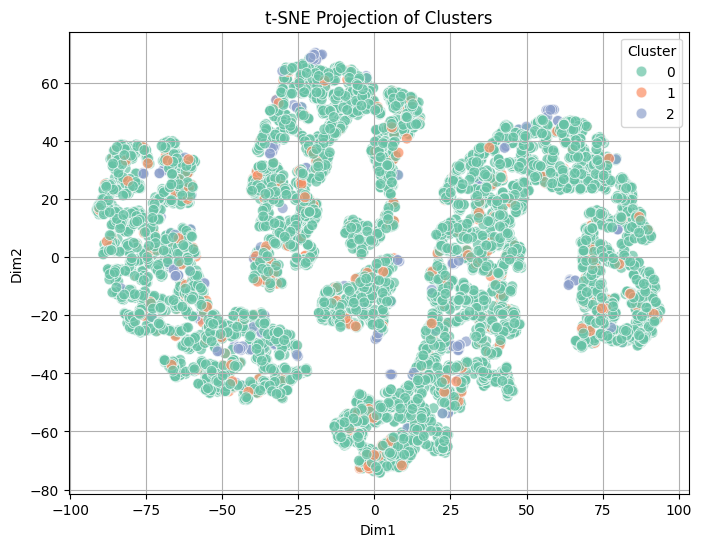

In [124]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_components = tsne.fit_transform(X)

tsne_df = pd.DataFrame(tsne_components, columns=['Dim1', 'Dim2'])
tsne_df['Cluster'] = best_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='Cluster', palette='Set2', s=60, alpha=0.7)
plt.title('t-SNE Projection of Clusters')
plt.grid(True)
plt.show()

As expected given the low silhouette score, the clusters aren't very well seperated which is confirmed by both the PCA and t-SNE visualizations. The overlap in the PCA plot suggests that the clusters are not distinct along the primary axes of variance. The complex, intermingled structures in the t-SNE plot further highlight the lack of clear separation and potentially indicate a more intricate, non-linear relationship between the data points belonging to different clusters.

Now we will have a closer look at the clusters in more detail, to identify customer profiles

In [125]:
# we add the clustering labels, the original conversion label and the age group and income group categories for the analysis
clustering_df['Cluster'] = best_labels
clustering_df['AgeGroup'] = df['AgeGroup']
clustering_df['IncomeGroup'] = df['IncomeGroup']
clustering_df['Conversion'] = conversion_labels
clustering_df.head()

Age  Gender  Income  PagesPerVisit  TimeOnSite  WebsiteVisits  EmailOpens  \
0   56  Female  136912       2.399017    7.396803              0           6   
1   69    Male   41760       2.917138    5.352549             42           2   
2   46  Female   88456       8.223619   13.794901              2          11   
3   32  Female   44085       4.540939   14.688363             47           2   
4   60  Female   83964       2.046847   13.993370              0           6   

   EmailEngagement  SocialShares  ClickThroughRate  ...  AvgSpendPerVisit  \
0         1.500000            19          0.043919  ...          0.000000   
1         3.500000             5          0.155725  ...         92.825443   
2         0.181818             0          0.277490  ...        773.214798   
3         1.000000            89          0.137611  ...         11.479275   
4         1.000000             6          0.252851  ...          0.000000   

   PreviousPurchases  LoyaltyPoints      AdSpend  CampaignChannel  \
0                  4            688  6497.870068     Social Media   
1                  2           3459  3898.668606            Email   
2                  8           2337  1546.429596              PPC   
3                  0           2463   539.525936              PPC   
4                  8           4345  1678.043573              PPC   

  CampaignType Cluster  AgeGroup IncomeGroup Conversion  
0    Awareness       0     55-64        High          1  
1    Retention       1       65+   Lower-Mid          1  
2    Awareness       0     45-54         Mid          1  
3   Conversion       0     25-34   Lower-Mid          1  
4   Conversion       0     55-64         Mid          1  

[5 rows x 21 columns]

In [126]:
cluster_summary = clustering_df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

               Age        Income  PagesPerVisit  TimeOnSite  WebsiteVisits  \
Cluster                                                                      
0        43.711703  84970.086720       5.558372    7.748725      25.389153   
1        41.558352  81390.803204       5.570373    7.398192      24.876430   
2        44.932039  80683.810680       5.180576    7.676543       1.718447   

         EmailOpens  EmailEngagement  SocialShares  ClickThroughRate  \
Cluster                                                                
0          9.915998         0.548470     49.862716          0.154206   
1          1.599542         5.074687     48.254005          0.169080   
2         10.504854         0.538904     50.830097          0.146824   

         EngagementScore  AvgSpendPerVisit  PreviousPurchases  LoyaltyPoints  \
Cluster                                                                        
0               0.508628        309.808278           4.473427    2494.775588   
1       

In [127]:
categorical_features = ['Gender', 'CampaignChannel', 'CampaignType', 'AgeGroup', 'IncomeGroup']

for col in categorical_features:
    print(f"\n{col} distribution by cluster:")
    print(clustering_df.groupby('Cluster')[col].value_counts(normalize=True))


Gender distribution by cluster:
Cluster  Gender
0        Female    0.603915
         Male      0.396085
1        Female    0.622426
         Male      0.377574
2        Female    0.601942
         Male      0.398058
Name: proportion, dtype: float64

CampaignChannel distribution by cluster:
Cluster  CampaignChannel
0        Referral           0.216257
         PPC                0.206470
         Email              0.194780
         SEO                0.192062
         Social Media       0.190431
1        PPC                0.208238
         SEO                0.205950
         Email              0.199085
         Referral           0.199085
         Social Media       0.187643
2        SEO                0.228155
         PPC                0.218447
         Referral           0.199029
         Email              0.179612
         Social Media       0.174757
Name: proportion, dtype: float64

CampaignType distribution by cluster:
Cluster  CampaignType 
0        Conversion       0.25825

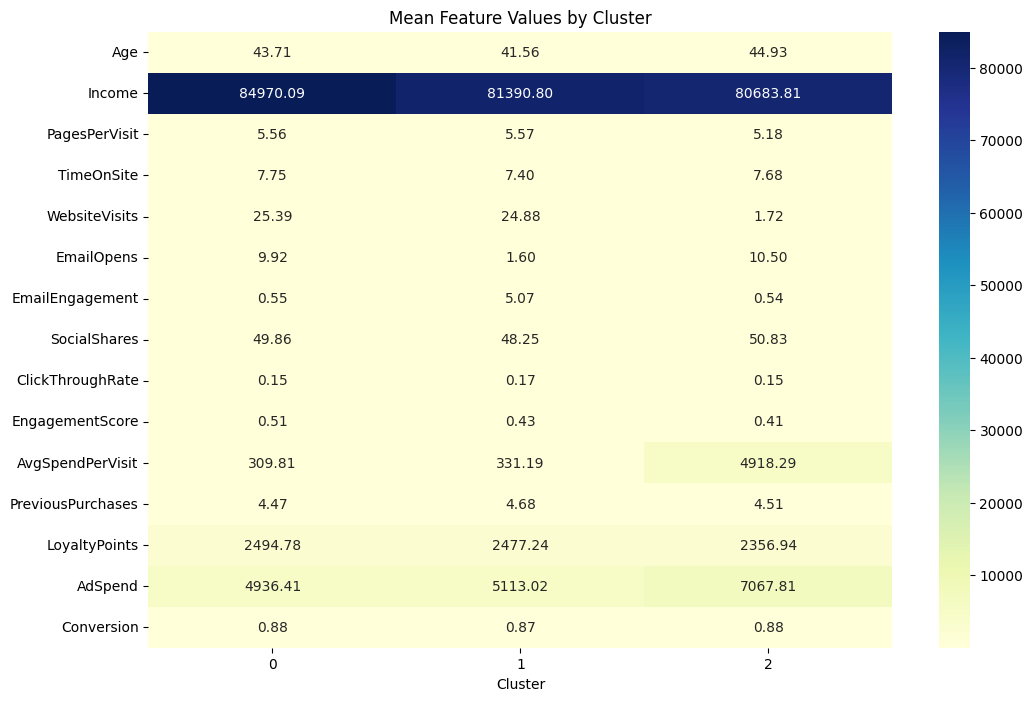

In [128]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary.T, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Mean Feature Values by Cluster")
plt.show()

We can see that the summary statistics and conversion rates across clusters don’t vary that dramatically at first glance, but we can still identify meaningful patterns discussed below.

Cluster 0 : The Solid Core 
- High Income: $84,970 (highest among all clusters)
- Moderate Engagement: Avg engagement score ~0.51
- High Loyalty Points: ~2,495 (highest)
- High Conversion Rate: 87.7%
- Low Email Engagement: 0.55
- High Website Visits: 25+
- Balanced Gender split: ~60/40 Female/Male
- Campaign Channel: Top = Referral & PPC (~21%)
- Campaign Type: Even split across all stages (balanced funnel exposure)

This cluster represents customers that are financially strong, loyal customers with good site engagement but low email responsiveness. They are influenced by referrals and PPC, and are already converting well.

Cluster 1 : The Email Responders
- Slightly Younger: Avg age 41.6
- Lower Income: $81,390
- High Email Engagement: 5.07 (very high!)
- Click-through Rate: 16.9% (highest)
- Conversion Rate: 86.7%
- Top Campaign Type: Retention & Awareness
- Gender: More female (62%)
- Lower Loyalty: 2,477 points (slightly lower)

This cluster represents email-engaged customers who react well to campaigns but are slightly younger and less loyal. Marketing could nurture their loyalty with retention incentives. Futre campaigns should focus on email and top-funnel messaging.

Cluster 2 : The Expensive Inactives
- Lowest Engagement Score: 0.41
- High Ad Spend: $7,068 (way more than others)
- High Avg Spend per Visit: $4,918 (massive)
- Lowest Website Visits: Only ~1.7 (!)
- Conversion Rate: 88.3% (highest!)
- Email + Loyalty: Very low engagement & loyalty
- Top Age Group: 35–64
- Income: Slightly lower than Cluster 0


This cluster represents the rare but lucrative segment. They don’t visit much, but when they do, they spend a lot and convert at a high rate. They’re expensive to acquire, but worthwhile for high-ticket items. Ideal for targeted luxury/high-value campaigns.

Now we will can visulize the difference between cluster, to confirm our findings

C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\2389100698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=clustering_df, palette='Set3')
C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\2389100698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=clustering_df, palette='Set3')
C:\Users\jess6\AppData\Local\Temp\ipykernel_23304\2389100698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=clustering_df, palette='Set3')
C:\Users\jess6\AppData\Local\Temp\ipy

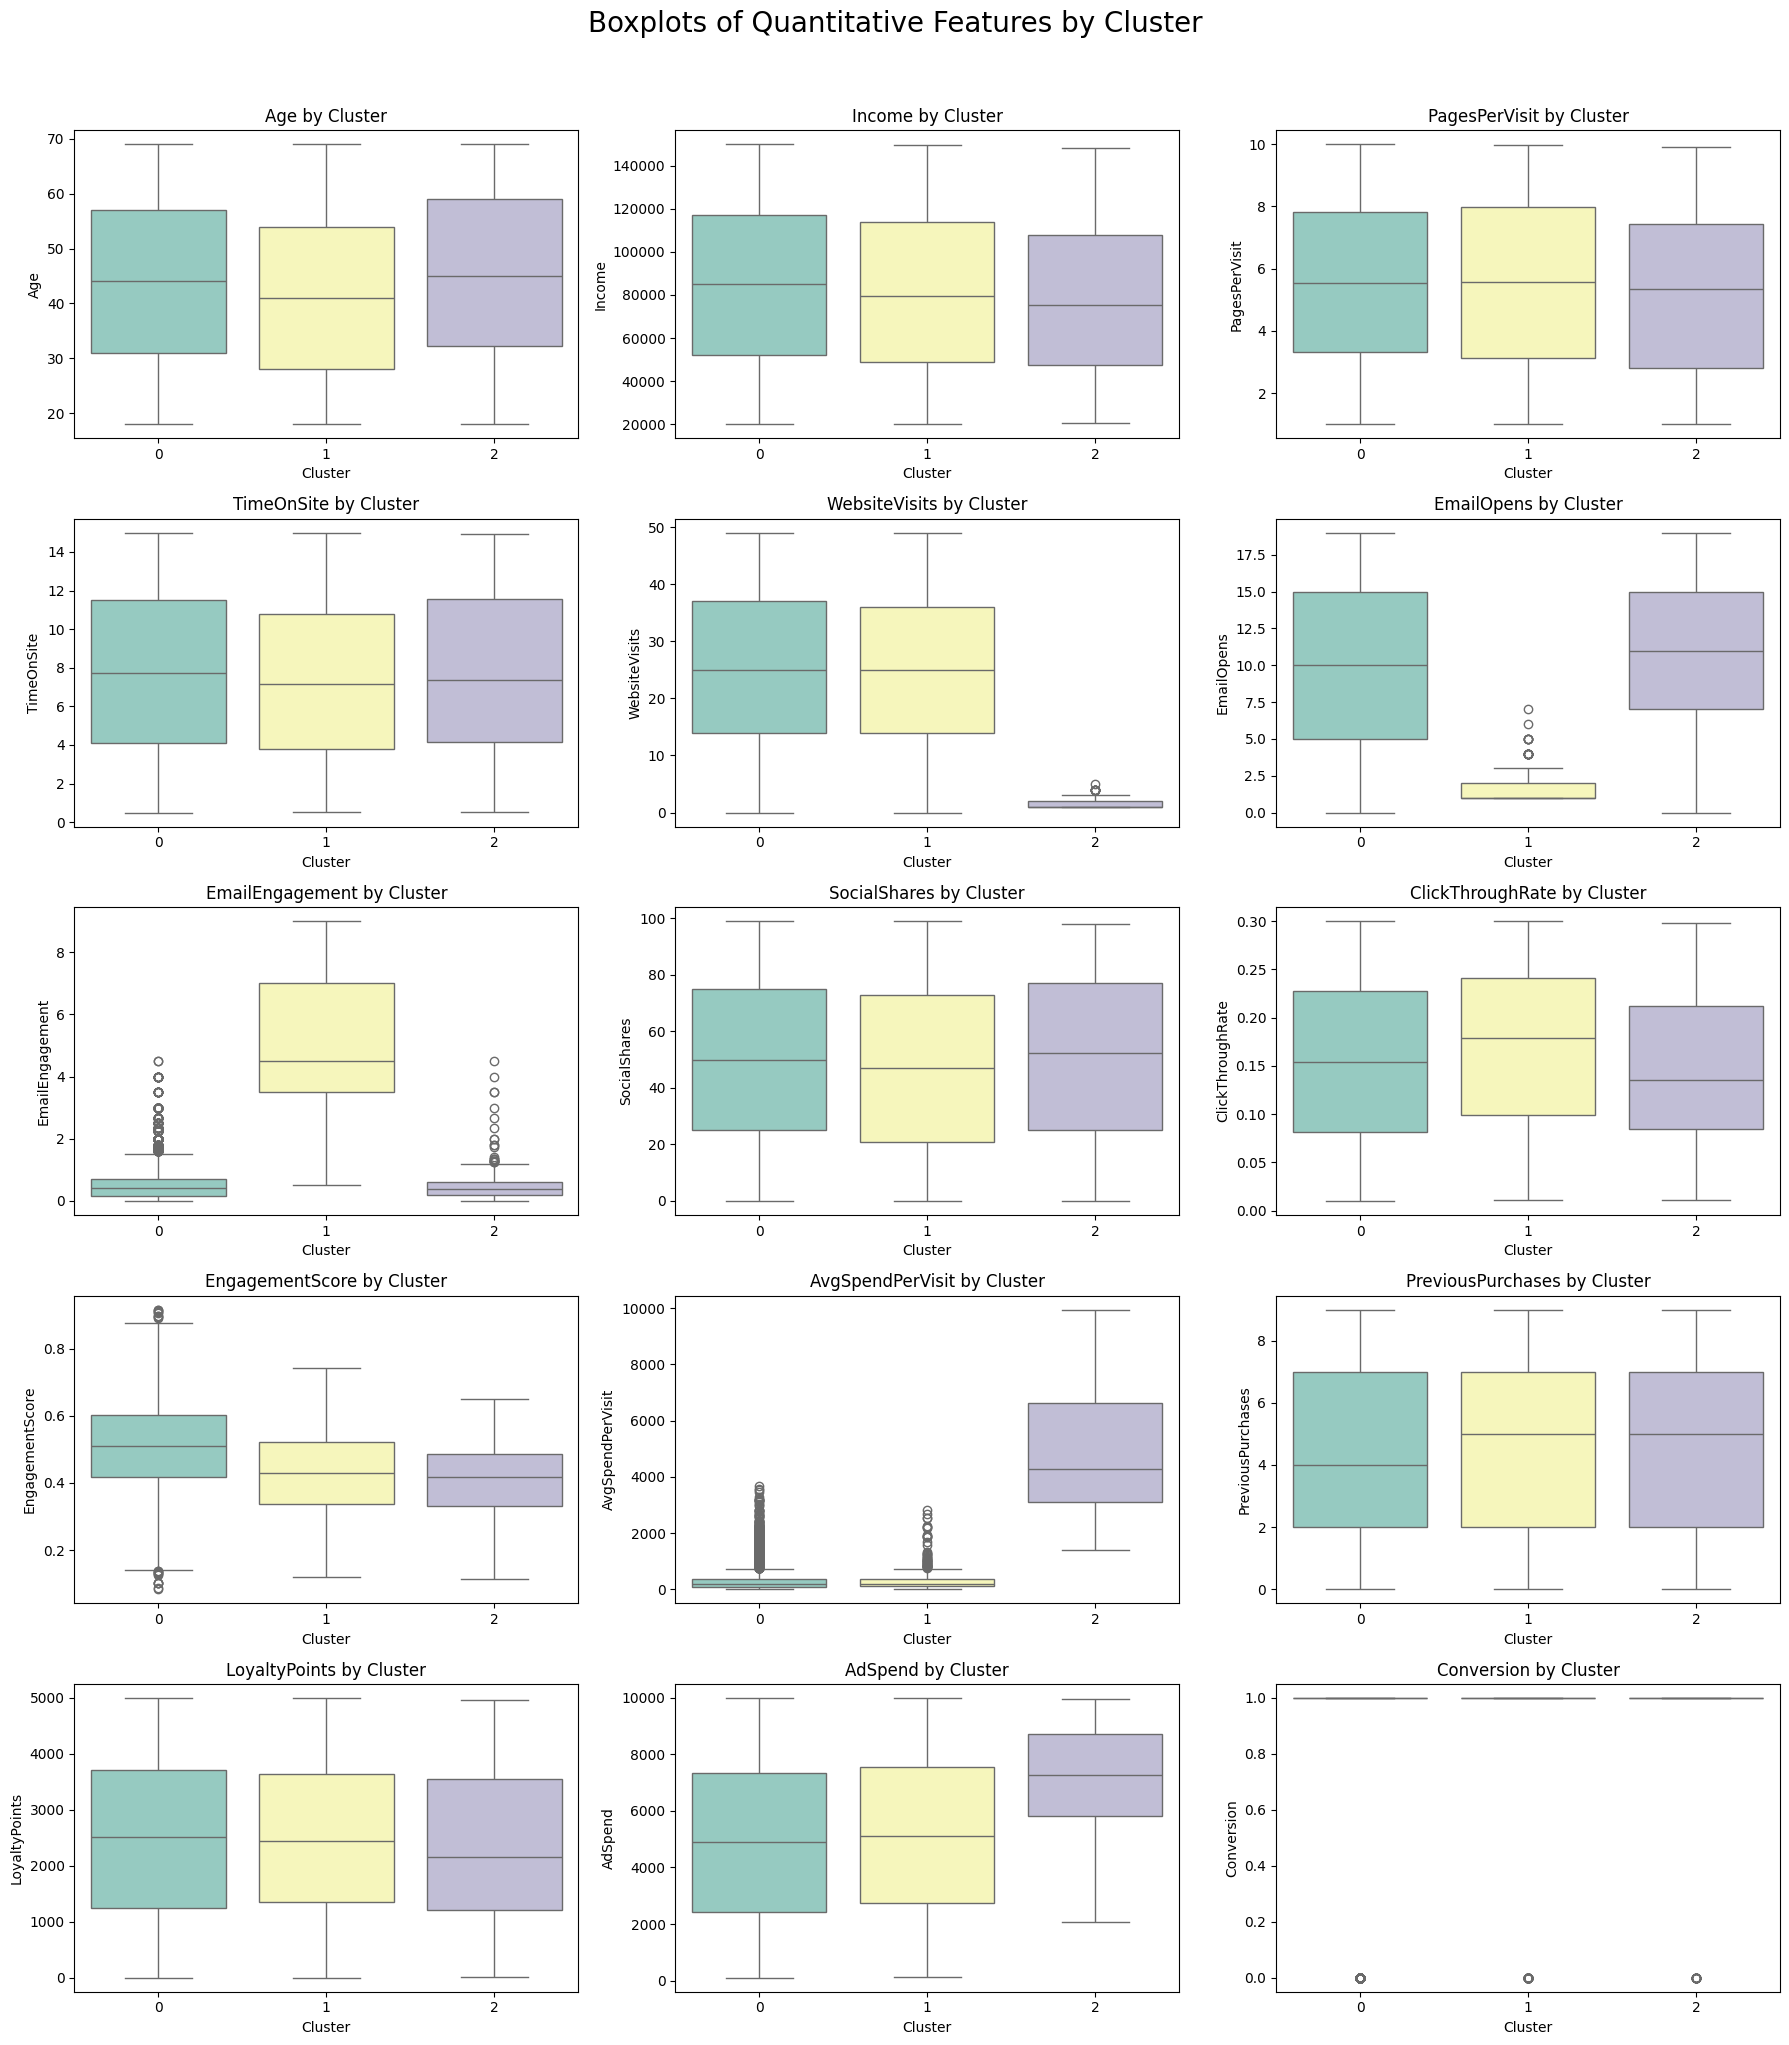

In [129]:
quant_features = [
    'Age', 'Income', 'PagesPerVisit', 'TimeOnSite', 'WebsiteVisits',
    'EmailOpens', 'EmailEngagement', 'SocialShares', 'ClickThroughRate',
    'EngagementScore', 'AvgSpendPerVisit', 'PreviousPurchases',
    'LoyaltyPoints', 'AdSpend', 'Conversion'
]

n_cols = 3
n_rows = -(-len(quant_features) // n_cols) 
plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(quant_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='Cluster', y=col, data=clustering_df, palette='Set3')
    plt.title(f'{col} by Cluster')
    plt.tight_layout()

plt.suptitle("Boxplots of Quantitative Features by Cluster", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

Comparing the distributions accross quantitative variables for each cluster confirms our insights on each cluster and their defining features

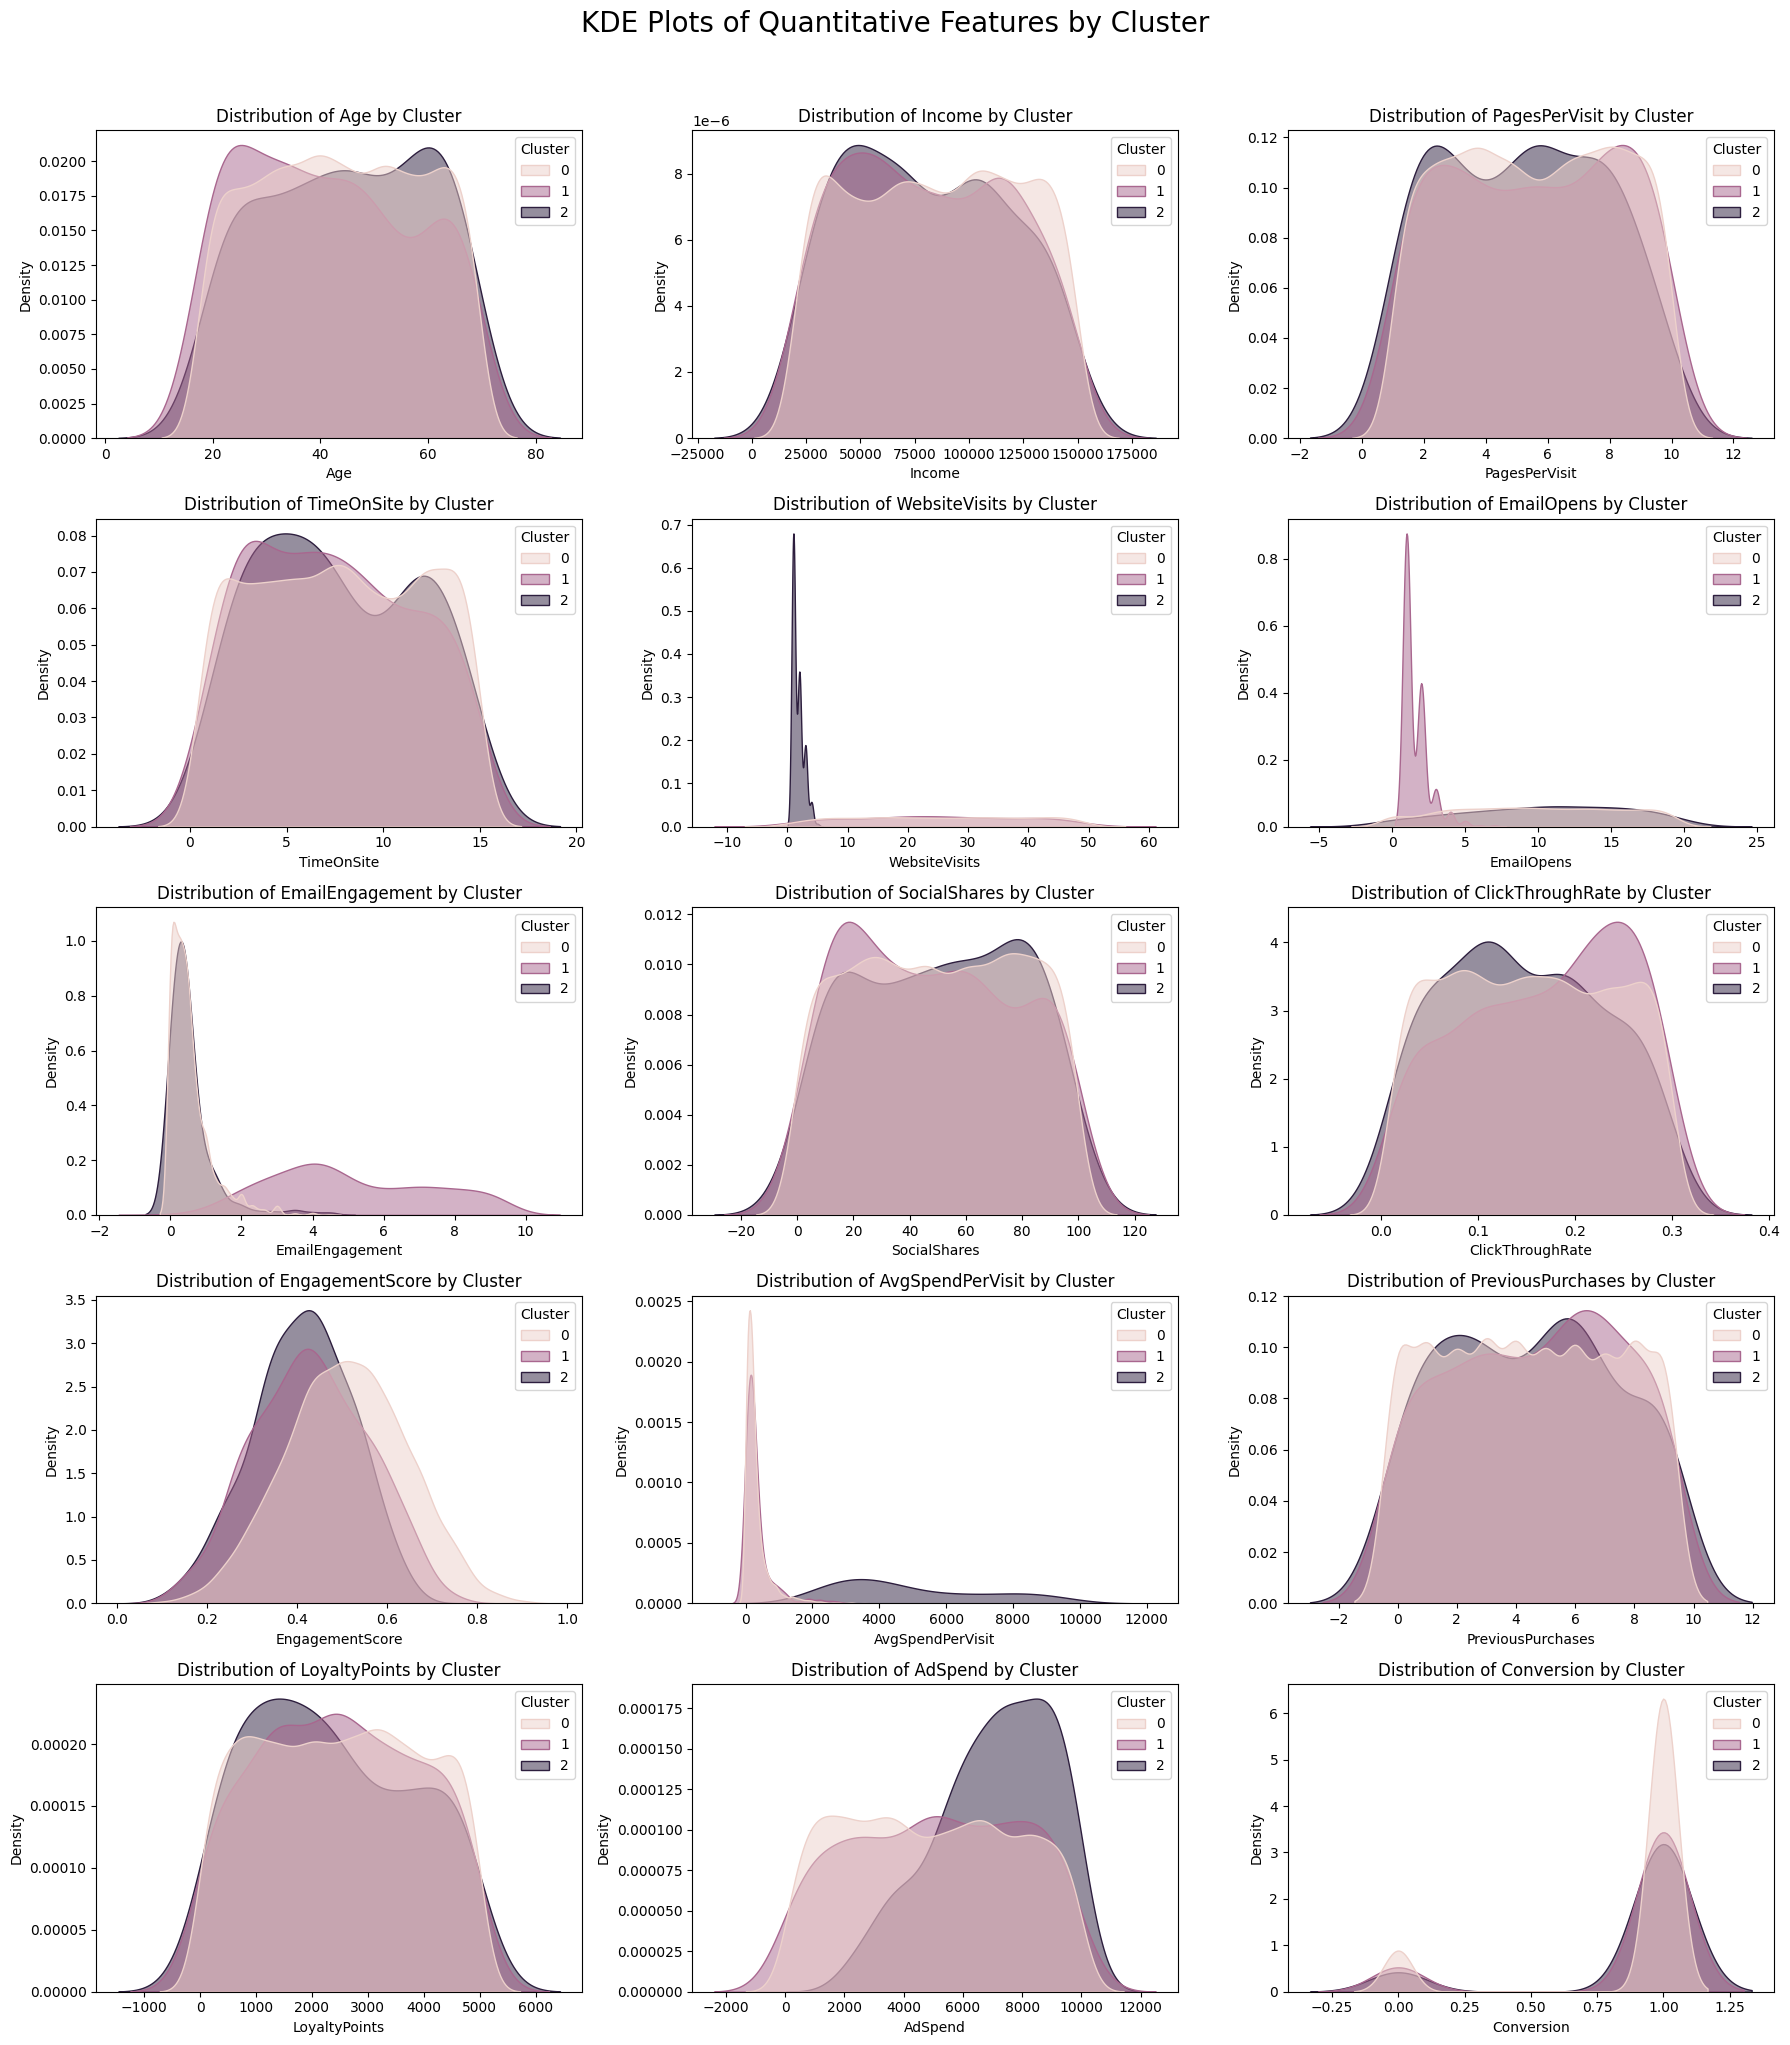

In [130]:
n_cols = 3
n_rows = -(-len(quant_features) // n_cols)
plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(quant_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=clustering_df, x=col, hue='Cluster', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {col} by Cluster')
    plt.tight_layout()

plt.suptitle("KDE Plots of Quantitative Features by Cluster", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

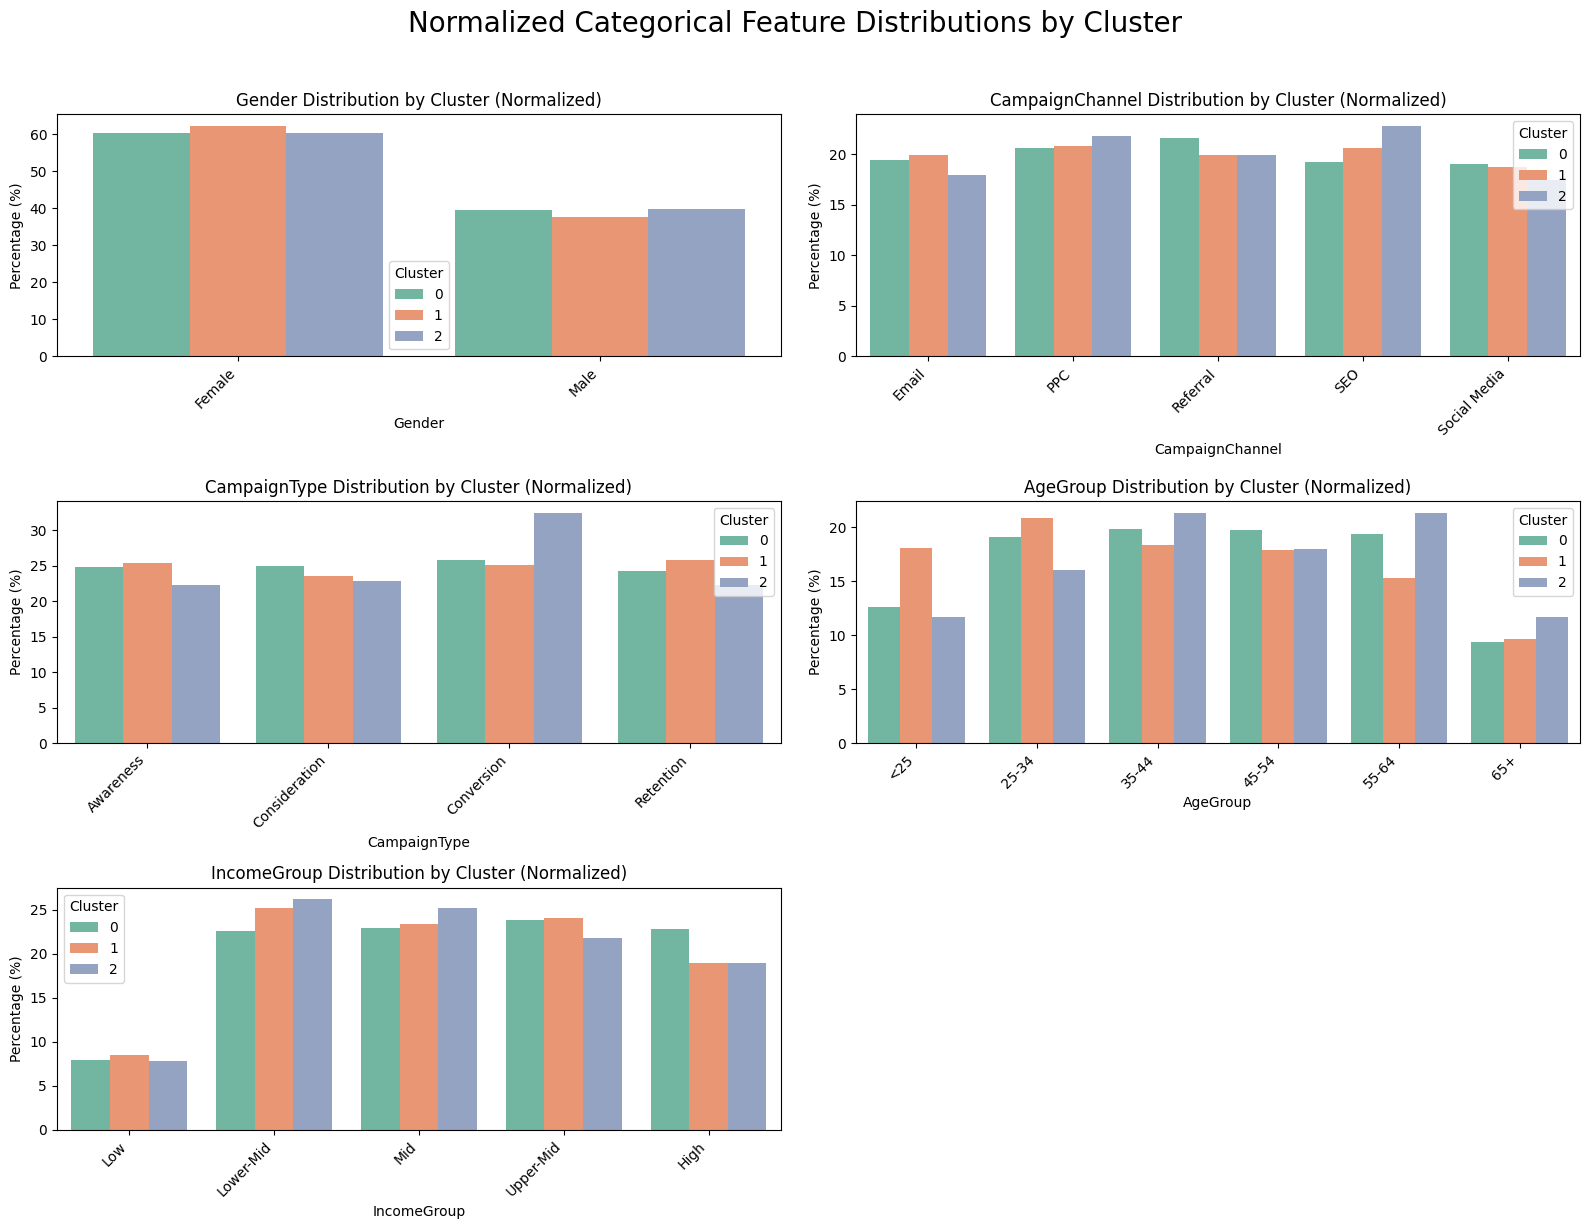

In [131]:
cat_features = ['Gender', 'CampaignChannel', 'CampaignType', 'AgeGroup', 'IncomeGroup']

n_cols = 2
n_rows = -(-len(cat_features) // n_cols)
plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_features, 1):
    plt.subplot(n_rows, n_cols, i)
    normalized_counts = clustering_df.groupby('Cluster')[col].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    sns.barplot(x=col, y='Percentage', hue='Cluster', data=normalized_counts, palette='Set2')
    plt.title(f'{col} Distribution by Cluster (Normalized)')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.suptitle("Normalized Categorical Feature Distributions by Cluster", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [132]:
cluster_means = clustering_df.groupby('Cluster')[quant_features].mean()

scaler = MinMaxScaler ()
cluster_scaled = pd.DataFrame(scaler.fit_transform(cluster_means), 
                              index=cluster_means.index, 
                              columns=quant_features)

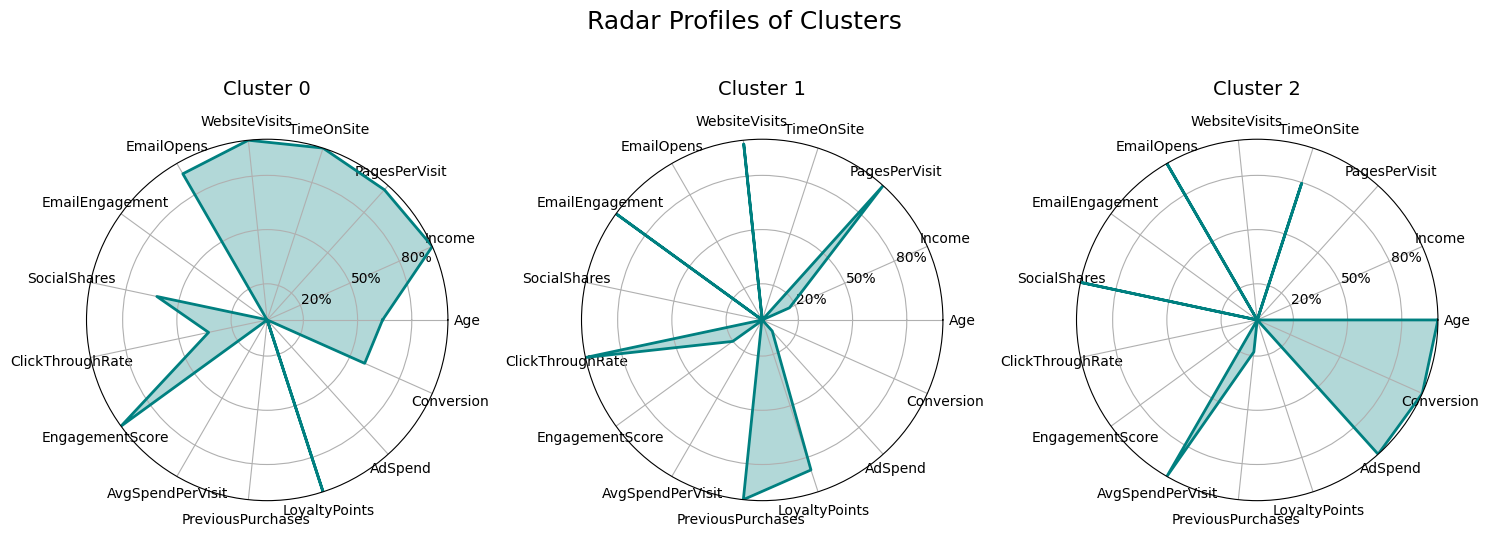

In [133]:
labels = quant_features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] 

n_clusters = cluster_scaled.shape[0]
fig, axes = plt.subplots(1, n_clusters, subplot_kw={'polar': True}, figsize=(5 * n_clusters, 5))

if n_clusters == 1:
    axes = [axes]

for i, (cluster, row) in enumerate(cluster_scaled.iterrows()):
    values = row.tolist()
    values += values[:1] 
    ax = axes[i]
    ax.plot(angles, values, color='teal', linewidth=2)
    ax.fill(angles, values, color='teal', alpha=0.3)
    ax.set_title(f'Cluster {cluster}', size=14, y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticks([0.2, 0.5, 0.8])
    ax.set_yticklabels(['20%', '50%', '80%'])
    ax.set_ylim(0, 1)

plt.suptitle("Radar Profiles of Clusters", size=18, y=1.05)
plt.tight_layout()
plt.show()

These plots confirm and are in line with what we've established for each cluster and their defining features.

### Predictive Analytics

Now we will focus on identifying features that lead customers to conversion through building different ML models.

In [229]:
pred_analytics_df = df[['Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'EmailEngagement', 'AvgSpendPerVisit', 'EngagementScore', 'Conversion']].copy()
pred_analytics_df['Cluster'] = best_labels

pred_analytics_df.head()

Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0   56  Female  136912    Social Media    Awareness  6497.870068   
1   69    Male   41760           Email    Retention  3898.668606   
2   46  Female   88456             PPC    Awareness  1546.429596   
3   32  Female   44085             PPC   Conversion   539.525936   
4   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  ...  \
0          0.043919        0.088031              0       2.399017  ...   
1          0.155725        0.182725             42       2.917138  ...   
2          0.277490        0.076423              2       8.223619  ...   
3          0.137611        0.088004             47       4.540939  ...   
4          0.252851        0.109940              0       2.046847  ...   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

   EmailEngagement  AvgSpendPerVisit  EngagementScore  Conversion  Cluster  
0         1.500000          0.000000         0.251786           1        0  
1         3.500000         92.825443         0.329676           1        1  
2         0.181818        773.214798         0.490563           1        0  
3         1.000000         11.479275         0.740088           1        0  
4         1.000000          0.000000         0.356194           1        0  

[5 rows x 21 columns]

In [230]:
pred_analytics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                8000 non-null   int64   
 1   Gender             8000 non-null   category
 2   Income             8000 non-null   int64   
 3   CampaignChannel    8000 non-null   category
 4   CampaignType       8000 non-null   category
 5   AdSpend            8000 non-null   float64 
 6   ClickThroughRate   8000 non-null   float64 
 7   ConversionRate     8000 non-null   float64 
 8   WebsiteVisits      8000 non-null   int64   
 9   PagesPerVisit      8000 non-null   float64 
 10  TimeOnSite         8000 non-null   float64 
 11  SocialShares       8000 non-null   int64   
 12  EmailOpens         8000 non-null   int64   
 13  EmailClicks        8000 non-null   int64   
 14  PreviousPurchases  8000 non-null   int64   
 15  LoyaltyPoints      8000 non-null   int64   
 16  EmailE

In [239]:
from sklearn.model_selection import train_test_split

X = pred_analytics_df.drop(columns=['Conversion'])
y = pred_analytics_df['Conversion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42) # stratify as classes are very imbalanced

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5600, 20), (2400, 20), (5600,), (2400,))

In [ ]:
# test to figure out which resampling method to use on our best model for the default hyperparametrs
'''X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.fit_transform(X_test)

results = {}

default_xgb = XGBClassifier(eval_metric='logloss', random_state=42)

print("\n--- XGBoost with SMOTETomek ---")
smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_processed, y_train)

xgb_smt = default_xgb
xgb_smt.fit(X_train_smt, y_train_smt)
y_pred_smt = xgb_smt.predict(X_test_processed)
y_proba_smt = xgb_smt.predict_proba(X_test_processed)[:, 1]

print(classification_report(y_test, y_pred_smt))
print("Confusion Matrix (SMOTETomek):\n", confusion_matrix(y_test, y_pred_smt))
results["XGBoost_SMOTETomek"] = roc_auc_score(y_test, y_proba_smt)

print("\n--- XGBoost with SMOTE ---")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

xgb_smote = default_xgb
xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = xgb_smote.predict(X_test_processed)
y_proba_smote = xgb_smote.predict_proba(X_test_processed)[:, 1]

print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_test, y_pred_smote))
results["XGBoost_SMOTE"] = roc_auc_score(y_test, y_proba_smote)


print("\n--- XGBoost with ADASYN ---")
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_processed, y_train)

xgb_adasyn = default_xgb
xgb_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = xgb_adasyn.predict(X_test_processed)
y_proba_xgb_adasyn = xgb_adasyn.predict_proba(X_test_processed)[:, 1]

print(classification_report(y_test, y_pred_adasyn))
print("Confusion Matrix (ADASYN):\n", confusion_matrix(y_test, y_pred_adasyn))
results["XGBoost_ADASYN"] = roc_auc_score(y_test, y_proba_xgb_adasyn)

print("\n--- AUC Scores (Default XGBoost) ---")
for model, auc in results.items():
    print(f"{model}: {auc:.4f}") '''


--- XGBoost with SMOTETomek ---
              precision    recall  f1-score   support

           0       0.15      0.78      0.26       296
           1       0.93      0.40      0.56      2104

    accuracy                           0.45      2400
   macro avg       0.54      0.59      0.41      2400
weighted avg       0.83      0.45      0.52      2400

Confusion Matrix (SMOTETomek):
 [[ 230   66]
 [1261  843]]

--- XGBoost with SMOTE ---
              precision    recall  f1-score   support

           0       0.16      0.78      0.26       296
           1       0.93      0.42      0.58      2104

    accuracy                           0.47      2400
   macro avg       0.55      0.60      0.42      2400
weighted avg       0.84      0.47      0.54      2400

Confusion Matrix (SMOTE):
 [[ 230   66]
 [1213  891]]

--- XGBoost with ADASYN ---
              precision    recall  f1-score   support

           0       0.18      0.76      0.29       296
           1       0.94      0.52 

We use resampling as the results without resampling were terrible given the class imbalance, after testing different resampling methods, ADASYN  performs best, so we will use it in our pipeline

In [232]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_features = X.select_dtypes(include='number').columns.tolist()
cat_features = X.select_dtypes(include='category').columns.tolist()

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN

models = {
    'LogReg': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

params = {
    'LogReg': {
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    'RandomForest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10, 20],
        'model__min_samples_leaf': [1, 5, 10],
        'model__max_features': ['sqrt', 'log2']
    },
    'XGBoost': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [5, 10, 20],
        'model__learning_rate': [0.01, 0.1, 0.3],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }
}

best_models = {}

for name in models:
    pipe = ImbPipeline([
        ('preprocessor', preprocessor),
        ('resampler', ADASYN(random_state=42)),
        ('model', models[name])
    ])
    
    grid = GridSearchCV(pipe, params[name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print(f"{name} Best AUC: {grid.best_score_:.4f}")
    print("Best params:", grid.best_params_)
    best_models[name] = grid

LogReg Best AUC: 0.8024
Best params: {'model__C': 0.01}
RandomForest Best AUC: 0.8134
Best params: {'model__max_depth': 20, 'model__max_features': 'log2', 'model__min_samples_leaf': 10, 'model__n_estimators': 200}
XGBoost Best AUC: 0.8308
Best params: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__subsample': 0.8}


In [234]:
from sklearn.metrics import classification_report, confusion_matrix

for name, grid in best_models.items():
    print(f"--- {name} ---")
    y_pred = grid.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


--- LogReg ---
              precision    recall  f1-score   support

           0       0.27      0.69      0.39       296
           1       0.94      0.73      0.83      2104

    accuracy                           0.73      2400
   macro avg       0.61      0.71      0.61      2400
weighted avg       0.86      0.73      0.77      2400

[[ 204   92]
 [ 559 1545]]
--- RandomForest ---
              precision    recall  f1-score   support

           0       0.62      0.37      0.47       296
           1       0.92      0.97      0.94      2104

    accuracy                           0.89      2400
   macro avg       0.77      0.67      0.70      2400
weighted avg       0.88      0.89      0.88      2400

[[ 110  186]
 [  67 2037]]
--- XGBoost ---
              precision    recall  f1-score   support

           0       0.76      0.38      0.51       296
           1       0.92      0.98      0.95      2104

    accuracy                           0.91      2400
   macro avg       0.8

In [242]:
from sklearn.metrics import roc_auc_score, roc_curve

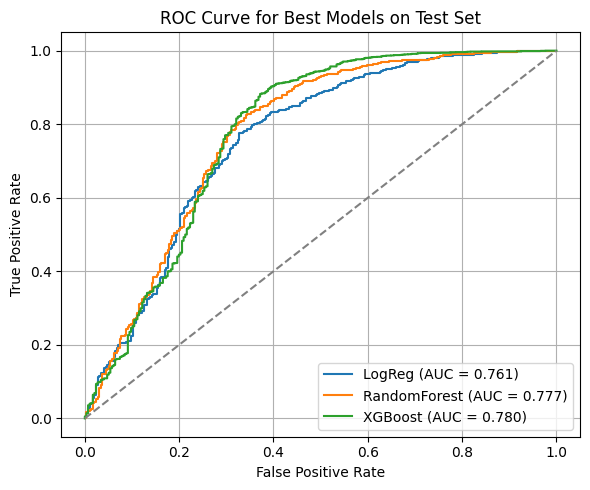

Test AUC Scores:
LogReg: 0.7606
RandomForest: 0.7767
XGBoost: 0.7798


In [240]:
test_auc_scores = {}

plt.figure(figsize=(6, 5))

for name, model in best_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    
    auc_score = roc_auc_score(y_test, y_proba)
    test_auc_scores[name] = auc_score
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Best Models on Test Set")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Test AUC Scores:")
for model_name, auc_val in test_auc_scores.items():
    print(f"{model_name}: {auc_val:.4f}")

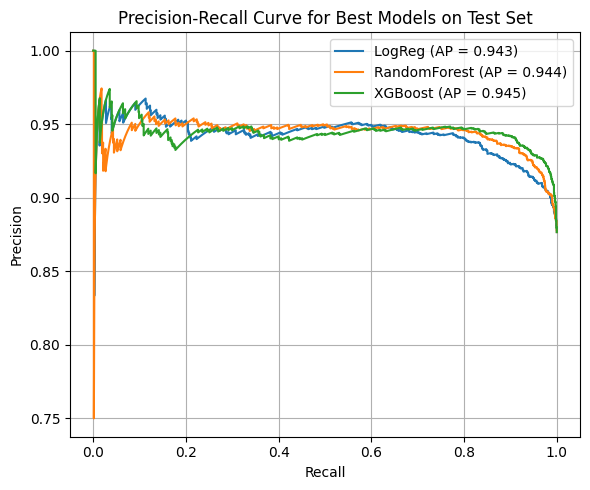

Test Average Precision Scores:
LogReg: 0.9428
RandomForest: 0.9441
XGBoost: 0.9445


In [218]:
from sklearn.metrics import precision_recall_curve, average_precision_score

test_pr_scores = {}

plt.figure(figsize=(6, 5))

for name, model in best_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
       
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.3f})")
    test_pr_scores[name] = avg_precision

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Best Models on Test Set")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Test Average Precision Scores:")
for model_name, ap_val in test_pr_scores.items():
    print(f"{model_name}: {ap_val:.4f}")

Now we can compare each model's performance in in predicting conversion. Logistic Regression, Random Forest, and XGBoost models were optimized using GridSearchCV and scored on ROC AUC.

Overall results on the training set:
- Logistic Regression: 0.8024
- Random Forest: 0.8134
- XGBoost: 0.8308

XGBoost demonstrated the strongest performance during the hyperparameter tuning process on the training data, achieving the highest AUC score. Random Forest followed closely, indicating good potential as well. Logistic Regression showed a slightly lower AUC but still presented a competitive performance during training.

Overall results on the test set:

Logistic Regression:
- Accuracy: 0.73
- Precision (Class 0 - Non-Conversion): 0.27
- Recall (Class 0 - Non-Conversion): 0.69
- F1-Score (Class 0 - Non-Conversion): 0.39
- Precision (Class 1 - Conversion): 0.94
- Recall (Class 1 - Conversion): 0.73
- F1-Score (Class 1 - Conversion): 0.83
- Test AUC: 0.7606
- Test Average Precision: 0.9428

Random Forest:
- Accuracy: 0.89
- Precision (Class 0 - Non-Conversion): 0.62
- Recall (Class 0 - Non-Conversion): 0.37
- F1-Score (Class 0 - Non-Conversion): 0.47
- Precision (Class 1 - Conversion): 0.92
- Recall (Class 1 - Conversion): 0.97
- F1-Score (Class 1 - Conversion): 0.94
- Test AUC: 0.7767
- Test Average Precision: 0.9441

XGBoost:
- Accuracy: 0.91
- Precision (Class 0 - Non-Conversion): 0.76
- Recall (Class 0 - Non-Conversion): 0.38
- F1-Score (Class 0 - Non-Conversion): 0.51
- Precision (Class 1 - Conversion): 0.92
- Recall (Class 1 - Conversion): 0.98
- F1-Score (Class 1 - Conversion): 0.95
- Test AUC: 0.7798
- Test Average Precision: 0.9445

XGBoost achieved the highest overall accuracy (0.91) on the test set and showed excellent ability in identifying the majority class (Conversion - Class 1), evidenced by high precision (0.92) and recall (0.98). However, its performance on the minority class (Non-Conversion - Class 0) had a lower recall (0.38), indicating it missed a considerable portion of actual non-conversion events, despite having the highest precision (0.76) for this class. The Test AUC (0.7798) and Average Precision (0.9445) were also the highest among the three models.

Random Forest demonstrated a strong performance with an accuracy of 0.89. While its recall for the minority class (0.37) was similar to XGBoost, its precision for this class (0.62) was also notable. It performed very well on the majority class. The Test AUC (0.7767) and Average Precision (0.9441) were also very competitive, slightly lower than XGBoost.

Logistic Regression showed the lowest overall accuracy (0.73) on the test set. It had a higher recall for the minority class (0.69) compared to the other two models but the lowest precision (0.27), suggesting it identified a larger proportion of actual non-conversion events but with a higher rate of false positives. Its performance on the majority class was good but lower than Random Forest and XGBoost. The Test AUC (0.7606) and Average Precision (0.9428) were the lowest among the three.

Overall **XGBoost** appears to be the best-performing model overall, achieving the highest accuracy, AUC, and Average Precision. 


Now we will move onto exploring feature importance using SHAP


Processing SHAP for: LogReg
SHAP Summary Plot - LogReg (Class 0)


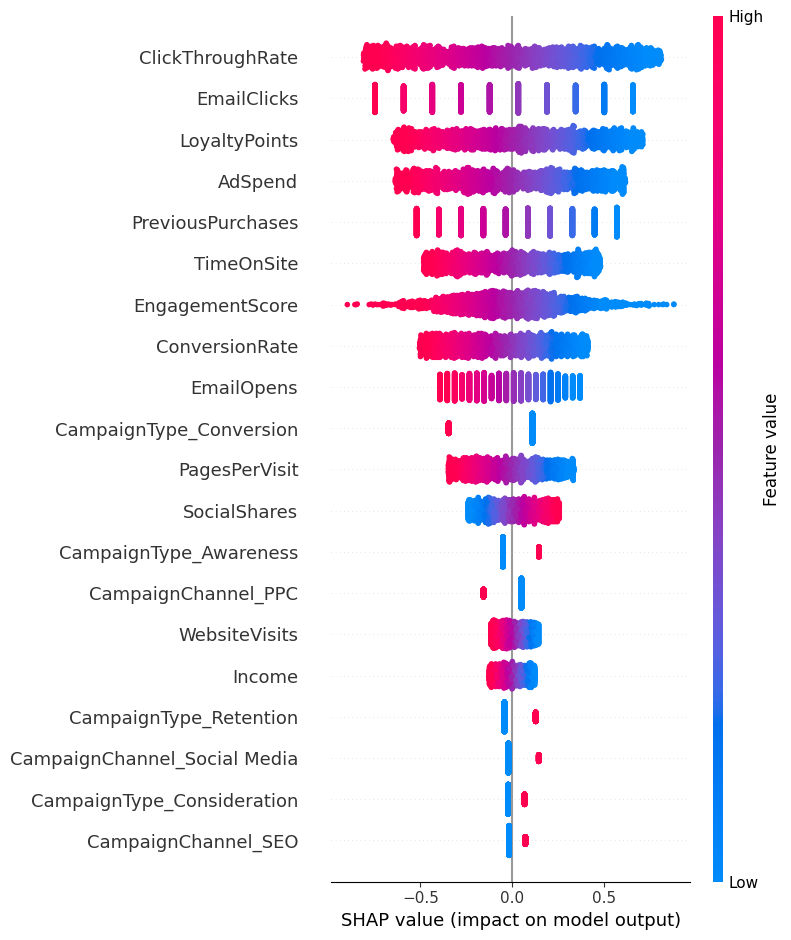

SHAP Summary Plot - LogReg (Class 1)


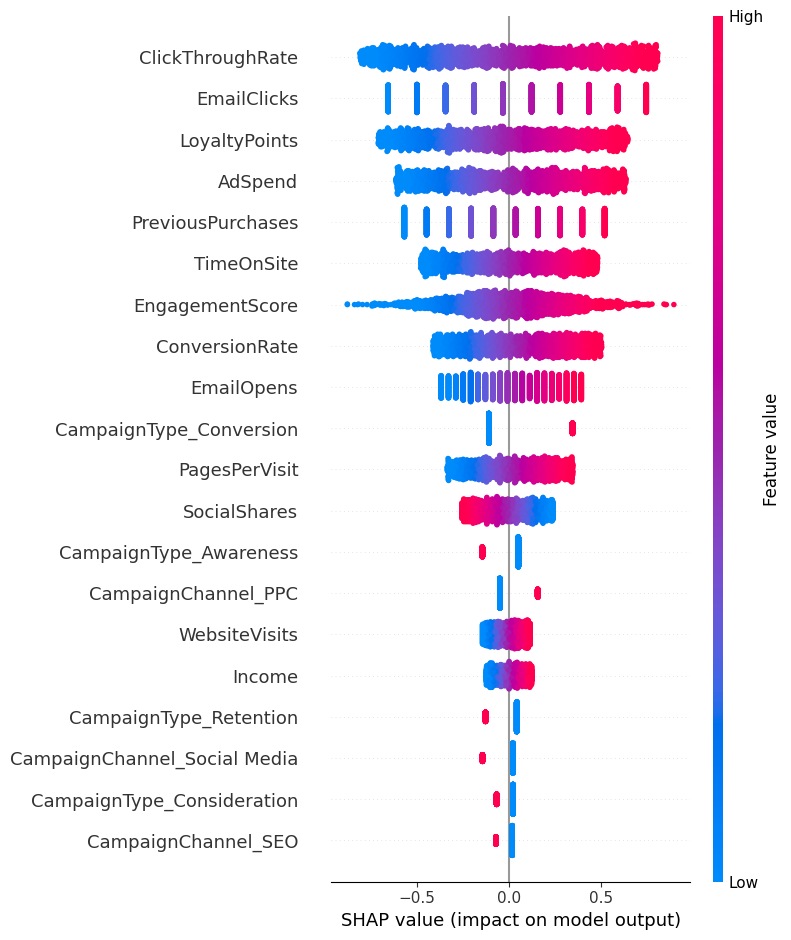


Processing SHAP for: RandomForest
SHAP Summary Plot - RandomForest (Class 0)


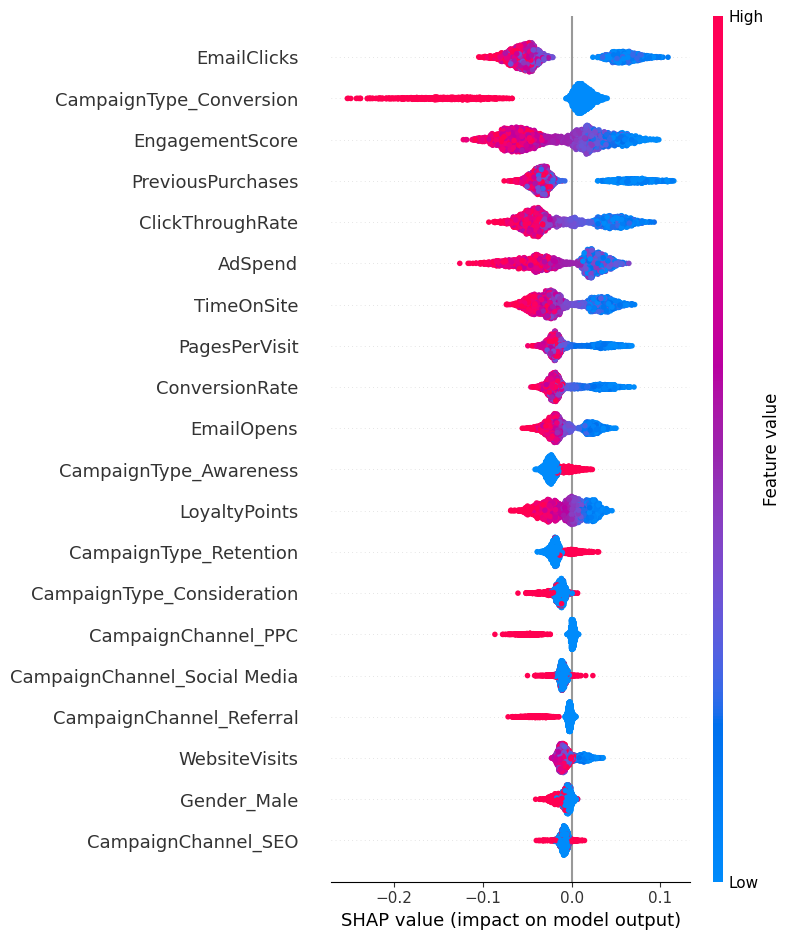

SHAP Summary Plot - RandomForest (Class 1)


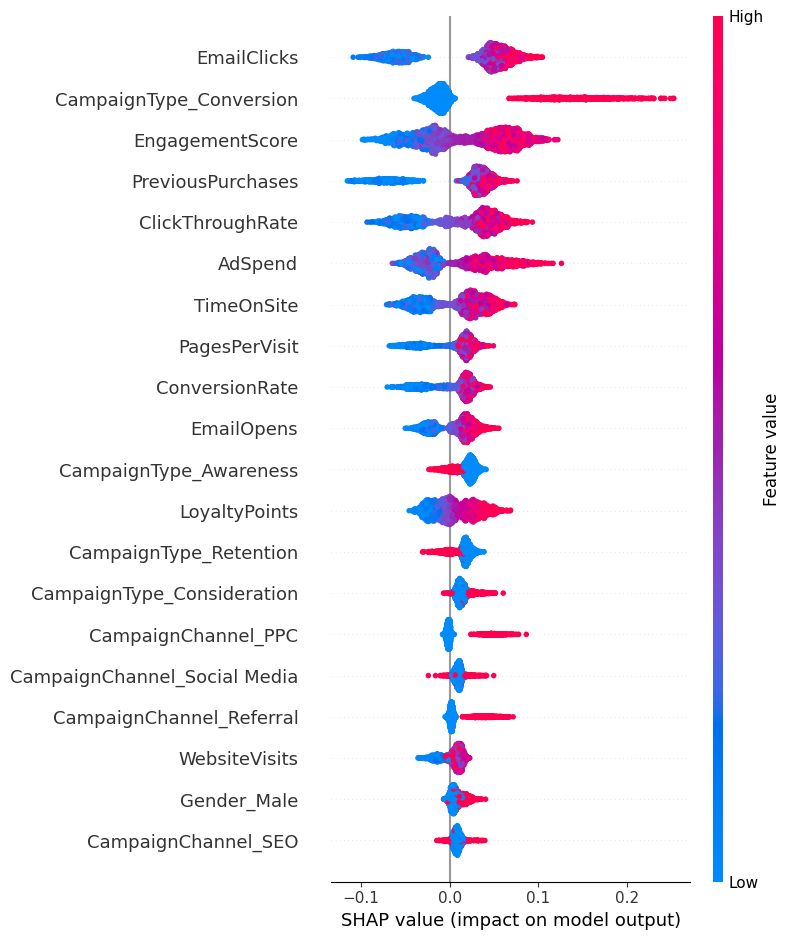


Processing SHAP for: XGBoost
SHAP Summary Plot - XGBoost (Single Output)


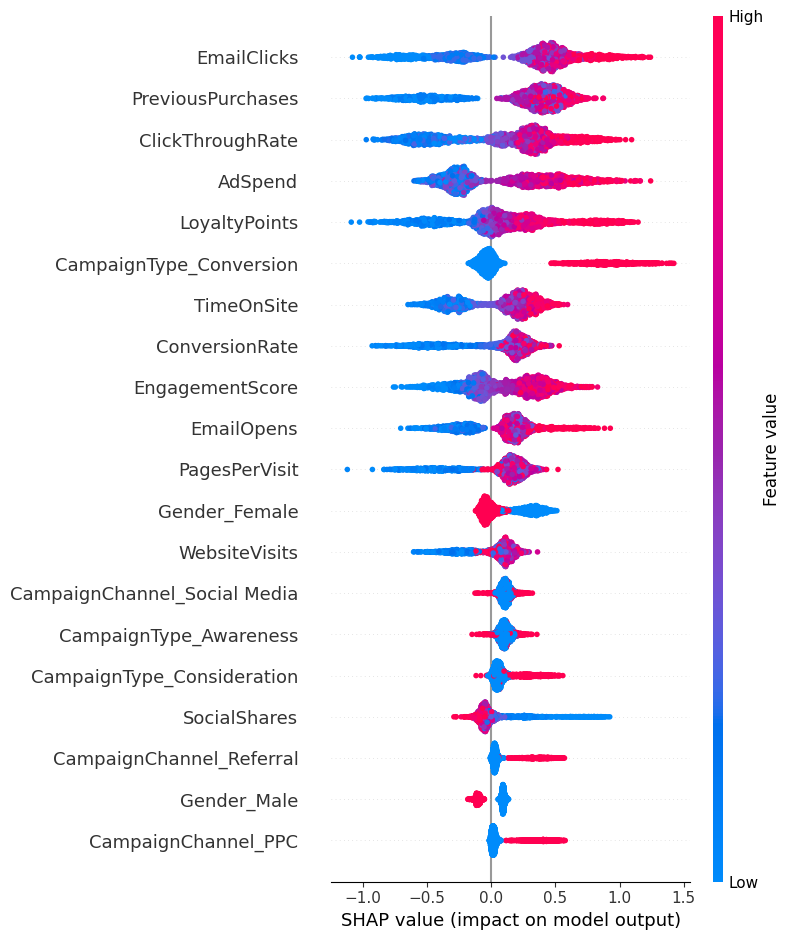

In [249]:
import shap

def get_feature_names_from_column_transformer(column_transformer):
    feature_names = []
    for name, transformer, columns in column_transformer.transformers_:
        if transformer == 'drop':
            continue
        elif transformer == 'passthrough':
            feature_names.extend(columns)
        elif hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(input_features=columns)
            feature_names.extend(names)
        elif hasattr(transformer, 'named_steps'):
            for step_name, step in transformer.named_steps.items():
                if isinstance(step, OneHotEncoder):
                    names = step.get_feature_names_out(input_features=columns)
                    feature_names.extend(names)
    return feature_names


for name, grid in best_models.items():
    print(f"\nProcessing SHAP for: {name}")

    try:
        best_pipeline = grid.best_estimator_
        preprocessor = best_pipeline.named_steps['preprocessor']
        model = best_pipeline.named_steps['model']

        X_train_processed = preprocessor.transform(X_train)
        X_test_processed = preprocessor.transform(X_test)
        feature_names = get_feature_names_from_column_transformer(preprocessor)

        if isinstance(model, LogisticRegression):
            explainer = shap.LinearExplainer(model, X_train_processed)
            shap_values = explainer.shap_values(X_test_processed)
            if len(shap_values.shape) == 2:
                for class_idx in range(model.classes_.shape[0]):
                    print(f"SHAP Summary Plot - {name} (Class {class_idx})")
                    shap.summary_plot(shap_values if len(model.classes_) == 2 and class_idx == 1 else -shap_values, X_test_processed, feature_names=feature_names)
            else:
                print(f"Unexpected SHAP output shape for {name}: {shap_values.shape}")

        else: # For RandomForest and XGBoost
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test_processed)
            if isinstance(shap_values, list) and len(shap_values) == 2:
                for class_idx in range(len(shap_values)):
                    print(f"SHAP Summary Plot - {name} (Class {class_idx})")
                    shap.summary_plot(shap_values[class_idx], X_test_processed, feature_names=feature_names)
            elif isinstance(shap_values, np.ndarray) and len(shap_values.shape) == 3:
                for class_idx in range(shap_values.shape[2]):
                    print(f"SHAP Summary Plot - {name} (Class {class_idx})")
                    shap.summary_plot(shap_values[:, :, class_idx], X_test_processed, feature_names=feature_names)
            elif isinstance(shap_values, np.ndarray) and len(shap_values.shape) == 2:
                print(f"SHAP Summary Plot - {name} (Single Output)")
                shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names)
            else:
                print(f"Unexpected SHAP output shape for {name}: {shap_values.shape}")

    except Exception as e:
        print(f"Error generating SHAP for {name}: {e}")

Now we can anlyse the results for each model as well as overall impacting features.

### For Logistic Regression:
The most important features are the following:
- **ClickThroughRate**: High ClickThroughRate has a strong positive SHAP value, significantly increasing the likelihood of conversion, while low ClickThroughRate has a strong negative SHAP value, decreasing the likelihood of conversion.
This highlights the critical role of compelling ads and effective targeting in driving conversions. Campaigns with low CTR are strong indicators of potential non-conversion. So there is aneed to focus on optimizing ad copy, visuals, and targeting to maximize ClickThroughRate. 
- **EmailClicks**: Higher EmailClicks strongly increase the likelihood of conversion, while lower EmailClicks strongly decrease it. Engaging email content and effective calls-to-action are crucial for driving conversions as a lack of engagement (no clicks) is a strong indicator of non-conversion. Therefore we need to optimize email content, segmentation, and timing to boost click rates as users who don't click on emails are highly likely not to convert through this channel.
- **LoyaltyPoints**: Higher LoyaltyPoints are associated with a higher likelihood of conversion, while lower LoyaltyPoints are associated with a lower likelihood. Rewarding and nurturing customer loyalty significantly contributes to conversions. So we need to implement or enhance loyalty programs to incentivize repeat engagement and purchases and target users with low loyalty points with specific campaigns to build engagement.
- **AdSpend**: Higher AdSpend shows a positive impact on conversion likelihood, though the effect might be less pronounced than direct engagement, while lower AdSpend has a negative impact. While investment in advertising is necessary, its direct impact on individual conversion probability as captured by this model seems moderate compared to user engagement. Therefore I would be best to optimize ad spending allocation across different channels and campaigns based on their engagement metrics. Simply increasing spending without engagement might not directly translate to higher conversion rates for all users.
- **PreviousPurchases**: More PreviousPurchases strongly increase the likelihood of conversion, while fewer PreviousPurchases strongly decrease it. Past purchasing behavior is a very strong indicator of future conversions, as new customers or those with few past purchases are more likely not to convert immediately. So we should focus on nurturing new customers and re-engaging past purchasers and segment campaigns based on purchase history.

Key Takeways and Marketing Insights:
- Engagement is Key: The top features driving conversion (and preventing non-conversion) are heavily related to user engagement with marketing efforts (clicks on ads and emails). This underscores the importance of creating compelling and relevant content that encourages interaction.
- Loyalty Matters: Customers who have demonstrated loyalty (higher points) are more likely to convert, suggesting the value of retention strategies.
- Past Behavior Predicts Future Actions: Previous purchase history is a significant predictor, highlighting the importance of customer relationship management and personalized follow-ups.
- Ad Spend Supports: While ad spending contributes to conversions, it's the user's interaction with those ads that has a more direct impact in this model.
- Channel-Specific Insights:  PPC channels are most effective at driving conversions, while Social Media and referrals do not necessarily drive conversions.
- Campaign Types-Specific Insights: Campaign types Retention, Awareness and Consieration are not as effective at driving conversions, as we had noted previously.

### For Random Forest:
The most important features are the following:
- **EmailClicks**: High EmailClicks has a strong positive SHAP value, significantly increasing the likelihood of conversion, while low EmailClicks has a strong negative SHAP value, decreasing the likelihood of conversion. This highlights the critical role of engaging email content and effective calls-to-action in driving conversions. Campaigns with low email click rates are strong indicators of potential non-conversion. Therefore, we need to focus on optimizing email content, segmentation, and timing to boost click rates, as users who don't click on emails are highly likely not to convert through this channel.
- **CampaignType_Conversion**: High values of CampaignType_Conversion show a clear positive SHAP value, indicating that users targeted with Conversion campaigns are significantly more likely to convert. Conversely, low values are associated with a lower likelihood of conversion.
This strongly validates the effectiveness of dedicated Conversion campaigns in achieving the desired outcome. It suggests that specific messaging and offers tailored for conversion are highly impactful. Therefore, we should prioritize and potentially increase investment in well-designed Conversion campaigns across relevant channels.
- **EngagementScore**: High EngagementScore has a positive SHAP value, increasing the likelihood of conversion, while low EngagementScore has a negative SHAP value, decreasing the likelihood of conversion. This emphasizes the importance of overall user engagement with our marketing efforts and website. Highly engaged users are more likely to become converters. So, we need to focus on strategies that boost user engagement across all touchpoints, such as interactive content, personalized experiences, and clear pathways to conversion.
- **PreviousPurchases**: More PreviousPurchases show a positive SHAP value, increasing the likelihood of conversion, while fewer PreviousPurchases show a negative SHAP value, decreasing the likelihood of conversion. Past purchasing behavior is a strong indicator of future conversions, as loyal customers are more likely to convert again. Therefore, we should focus on nurturing existing customers, implementing effective CRM strategies, and personalizing offers based on purchase history to encourage repeat conversions.
- **ClickThroughRate**: High ClickThroughRate has a positive SHAP value, increasing the likelihood of conversion, while low ClickThroughRate has a negative SHAP value, decreasing the likelihood of conversion. This shows the importance of compelling ad creatives and effective targeting in attracting users who are more likely to convert. Low CTR indicates a potential mismatch between the ad and the audience. So, there is a need to continuously test and optimize ad copy, visuals, and targeting to improve ClickThroughRate.

Key Takeaways and Marketing Insights:
- Direct Engagement Drives Conversion: Features like EmailClicks, ClickThroughRate, and EngagementScore are strong positive drivers of conversion. This highlights the need to create engaging and relevant content across all marketing channels.
- Targeted Conversion Efforts Work: CampaignType_Conversion being a top positive feature validates the strategy of running specific campaigns designed to drive conversions.
- Loyalty and Past Behavior are Assets: LoyaltyPoints and PreviousPurchases indicate the value of retaining customers and leveraging their history for future conversions.
- Ad Spend Supports Conversion: While AdSpend shows a positive trend, its impact relative to engagement suggests that optimizing the quality of ad engagement is more crucial than just increasing spending.
- Channel-Specific Insights: CampaignChannel_PPC and CampaignChannel_Referral show a tendency towards positive SHAP values when their value is high, suggesting they are more effective at driving conversions compared to CampaignChannel_Social Media and CampaignChannel_SEO which appear more centered around zero or slightly negative.
Campaign Types-Specific Insights: CampaignType_Retention and CampaignType_Awareness show a tendency towards negative SHAP values when their value is high, indicating they are less directly associated with immediate conversions as predicted by the model. CampaignType_Consideration appears more neutral.

### For XGBoost:
The most important features are the following:
- **EmailClicks**: High EmailClicks has a strong positive SHAP value, significantly increasing the likelihood of conversion, while low EmailClicks has a strong negative SHAP value, decreasing the likelihood of conversion. This highlights the critical role of engaging email content and effective calls-to-action in driving conversions. Campaigns with low email click rates are strong indicators of potential non-conversion. Therefore, we need to focus on optimizing email content, segmentation, and timing to boost click rates, as users who don't click on emails are highly likely not to convert through this channel.
- **PreviousPurchases**: More PreviousPurchases show a strong positive SHAP value, significantly increasing the likelihood of conversion, while fewer PreviousPurchases show a strong negative SHAP value, significantly decreasing the likelihood of conversion. Past purchasing behavior is a very strong indicator of future conversions, as loyal customers are much more likely to convert again. Therefore, we should prioritize nurturing existing customers, implementing effective CRM strategies, and personalizing offers based on purchase history to encourage repeat conversions.
- **ClickThroughRate**: High ClickThroughRate has a strong positive SHAP value, significantly increasing the likelihood of conversion, while low ClickThroughRate has a strong negative SHAP value, significantly decreasing the likelihood of conversion. This shows the importance of compelling ad creatives and effective targeting in attracting users who are more likely to convert. Low CTR indicates a potential mismatch between the ad and the audience. So, there is a need to continuously test and optimize ad copy, visuals, and targeting to improve ClickThroughRate.
- **AdSpend**: Higher AdSpend shows a positive impact on conversion likelihood, though the effect appears somewhat less pronounced than the top three, while lower AdSpend has a negative impact. While investment in advertising is necessary, its direct impact on individual conversion probability as captured by this model seems moderate compared to direct engagement and past behavior. Therefore, it would be best to optimize ad spending allocation across different channels and campaigns based on their engagement metrics and conversion efficiency, rather than solely focusing on increasing spend.
- **LoyaltyPoints**: Higher LoyaltyPoints are associated with a positive SHAP value, increasing the likelihood of conversion, while lower LoyaltyPoints are associated with a negative SHAP value, decreasing the likelihood of conversion. Rewarding and nurturing customer loyalty significantly contributes to conversions. So, we need to implement or enhance loyalty programs to incentivize repeat engagement and purchases and target users with low loyalty points with specific campaigns to build engagement and drive future conversions.

Key Takeaways and Marketing Insights:
- Engagement and Past Behavior Dominate: Similar to the Random Forest model, direct engagement with marketing (EmailClicks, ClickThroughRate) and past purchasing behavior are the strongest positive drivers of conversion.
- Targeted Spending Matters: While AdSpend has a positive impact, its lower ranking suggests that optimizing the effectiveness of ad campaigns (leading to higher CTR) is more critical than simply increasing the budget.
- Loyalty is a Strong Predictor: Loyalty programs effectively identify and encourage conversions from engaged customers.
- Channel-Specific Insights: CampaignChannel_Referral shows a clear positive impact on conversion and CampaignChannel_PPC also leans towards positive, while CampaignChannel_Social Media and CampaignChannel_SEO appear to have a less consistent positive impact.
- Campaign Types-Specific Insights: CampaignType_Conversion shows a positive association with conversion, while CampaignType_Retention and CampaignType_Awareness tend to have a negative or neutral association with immediate conversion, consistent with their position in the marketing funnel and CampaignType_Consideration shows a slightly positive trend.

### Overall
Across all three models, the following features consistently emerge as the most important positive drivers of conversion:
- Engagement Metrics (ClickThroughRate & EmailClicks): User interaction with marketing content, whether clicking on ads or within emails, is a strong indicator of conversion likelihood. Higher engagement directly translates to a higher probability of a user converting.
- Past Behavior (PreviousPurchases): Customers with a history of making purchases are significantly more likely to convert again. This highlights the importance of customer retention and loyalty.
- Loyalty (LoyaltyPoints): Customers who have accumulated loyalty points are more inclined to convert, indicating that rewarding and nurturing loyalty is effective in driving desired outcomes.
- Targeted Conversion Efforts (CampaignType_Conversion): Specifically targeting users with campaigns designed for conversion has a clear positive impact on their likelihood to convert.
- While AdSpend generally shows a positive association with conversion, its impact appears less direct and often secondary to user engagement and past behavior in these models.

Key Takeaway Marketing Insights Across All Models:
- Prioritize Engagement: Creating compelling and relevant content that encourages clicks and interaction across all marketing channels (ads, emails, website) is essential for driving conversions. Focus on optimizing creatives, messaging, and targeting to maximize engagement rates.
- Leverage Customer Loyalty and Purchase History: Implement and enhance loyalty programs to reward existing customers and incentivize repeat purchases. Utilize CRM data to personalize offers and re-engage past customers, recognizing their higher propensity to convert.
- Invest Strategically in Targeted Conversion Campaigns: Dedicate resources to developing and deploying specific campaigns with clear conversion goals and tailored messaging. The models consistently validate the effectiveness of this focused approach.
- Optimize Ad Spending for Engagement and Efficiency: Rather than simply increasing ad spend, focus on optimizing campaigns to improve ClickThroughRates and overall engagement. Allocate budgets to channels and campaigns that demonstrate higher engagement and conversion efficiency.

Channel-Specific Considerations:
- Referral and PPC channels tend to attract users with higher conversion intent and should be prioritized and optimized for conversion.
- As for Social Media and SEO, although valuable for broader marketing goals, their direct impact on immediate conversion might be less consistent. Strategies should focus on nurturing leads from these channels down the funnel.

Campaign Type Insights: 

Awareness and Retention campaigns are less likely to drive immediate conversions as predicted by these models, while Consideration campaigns show a more neutral to slightly positive impact. Therefore I would be better to focus on conversion-oriented messaging within Conversion campaigns.

If the clusters were more significantly sperated and more evenely distributed, to enhance this analysis, we could have trained separate models per cluster for personalized strategies for each cluster and we would have also used SHAP to see what drives conversion within each segment


## Conclusion and Recommendations

We have done a comprehensive analysis of our marketing funnel, A/B testing campaign variants, customer segmentation, and predictive modeling for future conversions on this dataset. By examining user behavior across different stages and campaigns, identifying key customer groups, and forecasting conversion likelihood, we have uncovered several actionable insights to optimize marketing efforts.

1. Which campaigns perform best?

Our funnel analysis revealed the following insights:

- Email campaigns generally give strong engagement in the initial stages (opens and clicks), but their effectiveness in driving website visits and final conversions varies significantly.
- Social media campaigns demonstrate exceptional initial reach through social shares, with a relatively small drop-off to website visits. However, the conversion rate from website visits needs improvement.
- PPC campaigns show a direct relationship between click-through rates and website visits, but like social media, the final conversion stage presents an area for optimization.

The A/B testing results show that Conversion-focused campaigns significantly outperform Retention campaigns across all tested channels (PPC, Email, and Social Media), as well as across different demographic segments including gender, age, and income level. The improvements in conversion rates were statistically significant and meaningful in practise.

Furthermore, the analysis of SHAP values, confirmed that Conversion campaigns do in fact lead to higher conversion rates, compared to other campaign types.

2. What types of customers convert?

Our customer segmentation analysis identified three distinct clusters with varying characteristics and conversion behaviors:

- Cluster 0: The Solid Core: High-income, loyal customers with strong website engagement, primarily driven by referrals and PPC. They exhibit a high conversion rate but low email engagement.
- Cluster 1: The Email Responders: Younger, slightly lower-income customers highly engaged with email campaigns. They have a good conversion rate and are responsive to retention and awareness messaging.
- Cluster 2: The Expensive Inactives: A small but lucrative group with low website visits but very high average spend and conversion rates when they do visit. They are expensive to acquire and show low engagement with email and loyalty programs.

While demographic factors (age, gender, income) did not show statistically significant differences in overall conversion rates across campaign types in the ANOVA analysis (likely due to the synthetic nature of the data), the cluster analysis provides valuable behavioral insights into distinct customer groups.

The predictive modeling phase showed that XGBoost is the most accurate model for forecasting conversions, achieving the highest AUC, accuracy, and average precision on the test set.

From the SHAP analysis across all three models, the types of customers who are most likely to convert are the following:
- Engaged customers who actively interact with marketing efforts (indicated by high ClickThrough Rates and high Email Click rates)
- Loyal customers such as individuals who have accumulated a significant number of Loyalty Points. Their continued engagement and past positive experiences make them more likely to convert again.
- Repeat customers who have a history of making Previous Purchases
- Customers targeted with Conversion campaigns
- Customers acquired through high-intent channels such as individuals who arrive via Referral and PPC channels.

3. How can we optimize marketing efforts?

Based on the insights from each section, we recommend:

For Funnel Analytics:
- Optimize the Website Visit to Conversion Stage: This is the most significant drop-off point across all channels. Focus on improving landing page design, user experience, checkout processes, and conversion incentives (e.g., discounts, urgency).
- Leverage High-Engagement Email Channels: Further segment and personalize email campaigns for users who show high open and click rates to drive more website visits and conversions.
- Capitalize on Social Media Sharing: Implement retargeting strategies for users who share content and visit the website but do not convert. 
- Experiment with stronger calls to action in social media posts.
- Re-evaluate Retention Tactics: Explore loyalty programs, personalized follow-up campaigns, or exclusive offers to improve conversion rates among users targeted for retention.

For A/B Testing:
- Shift Resources to Conversion Campaigns: Given the consistently superior performance of Conversion campaigns across all channels and demographics, consider reallocating budget and resources to these campaign types to maximize overall conversions.
- Personalize for Female Users: The stronger positive response to Conversion campaigns among female users suggests opportunities for further personalization within this segment.
- Continue Investing in Male Users: While the effect size was smaller, Conversion campaigns still significantly outperformed Retention efforts for male users. Continued investment is justified, alongside efforts to understand and address potential conversion barriers for this group.
- Focus on Younger Age Groups: Tailor Conversion campaign creatives and messaging to resonate with users under 45, as they showed the most substantial improvements.
- Maintain Broad Income Coverage: Conversion campaigns are effective across all income levels, particularly the lower-mid and upper-mid segments, suggesting a broad applicability of the messaging.
- Monitor Gender Trends: While not statistically significant in the ANOVA, the near-threshold results for gender warrant continued monitoring and potential future A/B testing with more specific hypotheses.
- Emphasize Behavioral Segmentation: Given the lack of strong demographic signals in the ANOVA, prioritize developing marketing strategies based on the behavioral insights gained from the cluster analysis.

For Customer Segmentation:
- Solid Core (Cluster 0): Focus on nurturing loyalty through exclusive offers and excellent service. Leverage referral programs and targeted PPC campaigns to further engage this high-value segment.
- Email Responders (Cluster 1): Continue to heavily utilize email marketing with top-of-funnel and retention-focused content. Explore strategies to increase their loyalty and average order value.
- Expensive Inactives (Cluster 2): Develop highly targeted, luxury-focused campaigns for this segment. Optimize the website experience for high-value purchases and explore direct outreach methods.

For Predictive Modeling:
- Integrate XGBoost for Targeting: Utilize the XGBoost model to identify users with a high probability of conversion and target them with personalized and timely marketing messages.
- Focus on High-Probability Non-Converters: Analyze the characteristics of users predicted as likely non-converters to understand potential barriers and develop strategies to influence their behavior.

For SHAP Analysis (Feature Importance):
- Enhance Content Engagement:
    - Ads: Continuously test and optimize ad copy, visuals, and targeting to maximize ClickThroughRates. Low-performing ads should be identified and improved or paused.
    - Emails: Focus on creating engaging email content with clear and compelling calls-to-action. Optimize email segmentation and timing to increase open and click rates.
    - Website: Ensure a user-friendly and intuitive website experience that facilitates conversion for engaged users.
- Strengthen Customer Loyalty Programs:
    - Implement or enhance loyalty programs that reward repeat engagement and purchases.
    - Target users with low loyalty points with specific campaigns designed to build engagement and encourage participation in the loyalty program.
- Leverage Purchase History for Personalization:
    - Implement CRM strategies to effectively track and analyze customer purchase history.
    - Personalize marketing messages, offers, and product recommendations based on past purchases to encourage repeat conversions.
    - Develop specific campaigns to re-engage inactive customers.
- Prioritize and Optimize Conversion-Focused Campaigns:
    - Recognize the effectiveness of dedicated 'Conversion' campaigns and ensure they are well-designed, targeted, and strategically deployed across relevant channels.
    - Continuously analyze the performance of these campaigns and iterate based on data-driven insights.
- Optimize Marketing Spend for Efficiency:
    - Shift focus from simply increasing ad spending to optimizing its allocation based on channel and campaign performance metrics, particularly engagement rates and conversion efficiency.
    - Invest more in channels and campaigns that demonstrate a higher propensity to drive engaged users and conversions (e.g., well-targeted PPC, effective referral programs).
- Channel and Campaign Type Optimization:
    - Referral Programs: Invest in and promote referral programs, as referred customers show a high likelihood of conversion.
    - PPC and SEO: Optimize these channels to capture users with higher purchase intent.
    - Social Media and Awareness Campaigns: Focus on using these channels for building brand awareness and engaging potential customers, nurturing them towards conversion through other channels.
    - Retention Campaigns: While not directly driving initial conversions, optimize retention campaigns to foster loyalty and encourage repeat purchases, which are strong conversion indicators.
    -  Consideration Campaigns: Fine-tune messaging in consideration campaigns to effectively guide users towards the final conversion stage.
